In [1]:
import importlib
import utils
importlib.reload(utils)
# Import necessary modules
import pandas as pd
import numpy as np
import torch

In [2]:
# Load the DataFrame (normally imported as shown)
label_df = pd.read_csv('Datasets/lable_df.csv')

# Convert "Instance" and "Pattern_Id" columns into a MultiIndex
label_df = label_df.set_index(['Instance', 'Pattern_Id'])

# Verify the MultiIndex structure
print(label_df.head())

ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv')

# Convert "Instance" and "Time" columns into a MultiIndex
ohcl_segments_df = ohcl_segments_df.set_index(['Instance', 'Time'])

# Verify the MultiIndex structure
print(ohcl_segments_df.head())

                     Pattern    Center     Width
Instance Pattern_Id                             
0        0                 5  0.337054  0.174107
         1                 4  0.794643  0.035714
         2                 1  0.136161  0.084821
1        0                 6  0.720982  0.191964
         1                 6  0.223214  0.241071
                     Open        High         Low       Close
Instance Time                                                
0        0     150.000000  153.070007  148.770004  152.110001
         1     154.360001  154.639999  143.009995  147.669998
         2     152.803335  153.519999  144.406662  147.603333
         3     151.246668  152.399999  145.803329  147.536667
         4     149.690002  151.279999  147.199997  147.470001


In [3]:
label_df

Pattern    Center     Width
Instance Pattern_Id                             
0        0                 5  0.337054  0.174107
         1                 4  0.794643  0.035714
         2                 1  0.136161  0.084821
1        0                 6  0.720982  0.191964
         1                 6  0.223214  0.241071
...                      ...       ...       ...
1763     1                 0  0.232143  0.053571
1764     0                 5  0.854911  0.093750
         1                 0  0.234375  0.058036
1765     0                 5  0.544643  0.053571
         1                 0  0.093750  0.035714

[2887 rows x 3 columns]

In [4]:
ohcl_segments_df

Open          High           Low         Close
Instance Time                                                        
0        0       150.000000    153.070007    148.770004    152.110001
         1       154.360001    154.639999    143.009995    147.669998
         2       152.803335    153.519999    144.406662    147.603333
         3       151.246668    152.399999    145.803329    147.536667
         4       149.690002    151.279999    147.199997    147.470001
...                     ...           ...           ...           ...
1765     219   12380.370117  12490.849609  12352.030273  12381.299805
         220   12375.150391  12504.330078  12350.160156  12431.530273
         221   12506.370117  12641.259766  12471.980469  12639.269531
         222   12630.580078  12655.839844  12141.519531  12141.709961
         223   12630.580078  12655.839844  12141.519531  12141.709961

[395584 rows x 4 columns]

In [5]:

from dataset import OHCLDataset  # Assuming your code is saved in dataset.py


# Load the DataFrame (normally imported as shown)
label_df = pd.read_csv('Datasets/lable_df.csv')

# Convert "Instance" and "Pattern_Id" columns into a MultiIndex
label_df = label_df.set_index(['Instance', 'Pattern_Id'])

# Verify the MultiIndex structure
# print(label_df.head())

ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv')

# Convert "Instance" and "Time" columns into a MultiIndex
ohcl_segments_df = ohcl_segments_df.set_index(['Instance', 'Time'])

# Verify the MultiIndex structure
# print(ohcl_segments_df.head())


# Initialize the OHCLDataset class
train_dataset = OHCLDataset(label_df=label_df, ohcl_segments_df=ohcl_segments_df)

# Test the length of the dataset
print("Length of dataset:", len(train_dataset))

# Test the __getitem__ method
for i in range(3):
    ohcl, label = train_dataset[i]
    print(f"Instance {i}:")
    print("length of OHCL Data:", len(ohcl[0]))
    print("OHCL Data (reshaped):", ohcl)
    print("Label Data:", label)


Length of dataset: 1766
Instance 0:
length of OHCL Data: 224
OHCL Data (reshaped): tensor([[150.0000, 154.3600, 152.8033, 151.2467, 149.6900, 150.1800, 155.2300,
         158.1600, 155.5400, 155.8250, 156.1100, 156.3950, 156.6800, 156.2600,
         153.5800, 153.5000, 154.3333, 155.1667, 156.0000, 156.2700, 154.0000,
         156.9700, 155.7500, 155.3333, 154.9167, 154.5000, 151.6100, 153.3100,
         156.6600, 153.1700, 153.0233, 152.8767, 152.7300, 151.4900, 153.6400,
         155.6700, 151.8000, 152.2900, 152.7800, 153.2700, 154.3400, 152.2200,
         148.8100, 147.2600, 147.0950, 146.9300, 146.7650, 146.6000, 143.3700,
         142.0900, 141.4600, 141.9333, 142.4067, 142.8800, 141.7500, 138.5800,
         136.3000, 142.5400, 142.8100, 143.0800, 143.3500, 143.5600, 140.1500,
         141.2600, 139.1900, 137.9767, 136.7633, 135.5500, 138.4400, 135.9300,
         133.9700, 136.8900, 135.6400, 134.3900, 133.1400, 135.5600, 136.9600,
         134.6600, 130.1400, 131.2867, 132.4333,

In [6]:
import torch
from utils import intersection_over_union

# Example testing for IoU in 1D
def test_iou():
    # Test Case 1: Overlapping boxes
    preds = torch.tensor([[5.0, 4.0]])  # Midpoint (x=5), Width (w=4)
    labels = torch.tensor([[6.0, 2.0]])  # Midpoint (x=6), Width (w=2)
    iou_midpoint = intersection_over_union(preds, labels, box_format="midpoint")
    print(f"Test Case 1 (Overlapping, Midpoint): IoU = {iou_midpoint.item()}")

    # Test Case 2: Non-overlapping boxes
    preds = torch.tensor([[1.0, 2.0]])  # Midpoint (x=1), Width (w=2)
    labels = torch.tensor([[5.0, 2.0]])  # Midpoint (x=5), Width (w=2)
    iou_non_overlap = intersection_over_union(preds, labels, box_format="midpoint")
    print(f"Test Case 2 (Non-overlapping, Midpoint): IoU = {iou_non_overlap.item()}")

    # Test Case 3: Fully overlapping boxes
    preds = torch.tensor([[4.0, 6.0]])  # Midpoint (x=4), Width (w=6)
    labels = torch.tensor([[4.0, 6.0]])  # Midpoint (x=4), Width (w=6)
    iou_full_overlap = intersection_over_union(preds, labels, box_format="midpoint")
    print(f"Test Case 3 (Fully Overlapping, Midpoint): IoU = {iou_full_overlap.item()}")

    # Test Case 4: Using "corners" format
    preds = torch.tensor([[1.0, 3.0]])  # x1=1, x2=3
    labels = torch.tensor([[2.0, 4.0]])  # x1=2, x2=4
    iou_corners = intersection_over_union(preds, labels, box_format="corners")
    print(f"Test Case 4 (Overlapping, Corners): IoU = {iou_corners.item()}")

# Run the test cases
test_iou()


Test Case 1 (Overlapping, Midpoint): IoU = 0.49999988079071045
Test Case 2 (Non-overlapping, Midpoint): IoU = 0.0
Test Case 3 (Fully Overlapping, Midpoint): IoU = 0.9999998211860657
Test Case 4 (Overlapping, Corners): IoU = 0.33333322405815125


In [7]:
import torch
from utils import non_max_suppression

# Sample bounding boxes format: [class_pred, prob_score, x (midpoint), w (width)]
bboxes = [
    [0, 0.9, 3.5, 3],  # class_pred = 0, prob_score = 0.9, midpoint = 3.5, width = 3 (x1 = 2, x2 = 5)
    [0, 0.75, 4.5, 3],  # class_pred = 0, prob_score = 0.75, midpoint = 4.5, width = 3 (x1 = 3, x2 = 6)
    [0, 0.8, 5.5, 3],   # class_pred = 0, prob_score = 0.8, midpoint = 5.5, width = 3 (x1 = 4, x2 = 7)
    [1, 0.6, 2.5, 2],   # class_pred = 1, prob_score = 0.6, midpoint = 2.5, width = 2 (x1 = 1, x2 = 4)
    [1, 0.85, 3.75, 2], # class_pred = 1, prob_score = 0.85, midpoint = 3.75, width = 2 (x1 = 2.75, x2 = 4.75)
]

# IOU threshold and probability threshold
iou_threshold = 0.48
threshold = 0.7

# Test non_max_suppression with midpoint format
bboxes_after_nms = non_max_suppression(bboxes, iou_threshold, threshold, box_format="midpoint")

# Print the result after NMS
print("Bounding boxes after NMS:")
for bbox in bboxes_after_nms:
    print(bbox)


Bounding boxes after NMS:
[0, 0.9, 3.5, 3]
[1, 0.85, 3.75, 2]
[0, 0.8, 5.5, 3]


In [8]:
import torch
from utils import convert_cellboxes

# Sample input parameters
batch_size = 3  # Number of images in a batch
S = 7           # Grid size
B = 2           # Number of bounding boxes per grid cell
C = 8           # Number of classes

# Generate random predictions to simulate YOLO output
# Shape: (batch_size, S * (C + B * 3)) = (batch_size, 8 * 14)
predictions = torch.rand((batch_size, 7 * 14))  # Adjust the shape for your specific use case

print ("Predictions : ", predictions)

# Call the function
converted_preds = convert_cellboxes(predictions, S=S, B=B, C=C)

# Output the results for inspection
print("Converted Predictions:")
print(converted_preds)
print("Shape of Converted Predictions:", converted_preds.shape)


Predictions :  tensor([[0.4445, 0.8082, 0.6251, 0.0824, 0.2548, 0.9146, 0.3402, 0.3223, 0.0164,
         0.6204, 0.7452, 0.8882, 0.0155, 0.1901, 0.0326, 0.7049, 0.9568, 0.1388,
         0.6972, 0.4008, 0.5302, 0.2603, 0.2934, 0.1567, 0.1808, 0.2939, 0.9703,
         0.4118, 0.9181, 0.3994, 0.4355, 0.5448, 0.5235, 0.8351, 0.8548, 0.1827,
         0.0853, 0.9542, 0.8650, 0.5951, 0.0763, 0.3211, 0.5814, 0.9287, 0.2849,
         0.0155, 0.3471, 0.8968, 0.8868, 0.7855, 0.5809, 0.9374, 0.3605, 0.2791,
         0.1550, 0.0294, 0.8580, 0.8829, 0.2555, 0.4000, 0.6518, 0.2647, 0.6045,
         0.2468, 0.1419, 0.3931, 0.0300, 0.3426, 0.2551, 0.0500, 0.7943, 0.2296,
         0.7962, 0.1336, 0.9185, 0.5929, 0.6910, 0.0493, 0.6939, 0.4287, 0.0156,
         0.3549, 0.5917, 0.3561, 0.5611, 0.9591, 0.9724, 0.9406, 0.6390, 0.8340,
         0.0406, 0.6672, 0.8856, 0.9450, 0.9146, 0.7280, 0.2077, 0.8581],
        [0.4467, 0.6333, 0.0903, 0.6275, 0.7933, 0.4804, 0.9212, 0.1674, 0.8661,
         0.7885, 0.1

In [9]:
predictions=predictions.reshape(batch_size, 7, 14 )
predictions

tensor([[[0.4445, 0.8082, 0.6251, 0.0824, 0.2548, 0.9146, 0.3402, 0.3223,
          0.0164, 0.6204, 0.7452, 0.8882, 0.0155, 0.1901],
         [0.0326, 0.7049, 0.9568, 0.1388, 0.6972, 0.4008, 0.5302, 0.2603,
          0.2934, 0.1567, 0.1808, 0.2939, 0.9703, 0.4118],
         [0.9181, 0.3994, 0.4355, 0.5448, 0.5235, 0.8351, 0.8548, 0.1827,
          0.0853, 0.9542, 0.8650, 0.5951, 0.0763, 0.3211],
         [0.5814, 0.9287, 0.2849, 0.0155, 0.3471, 0.8968, 0.8868, 0.7855,
          0.5809, 0.9374, 0.3605, 0.2791, 0.1550, 0.0294],
         [0.8580, 0.8829, 0.2555, 0.4000, 0.6518, 0.2647, 0.6045, 0.2468,
          0.1419, 0.3931, 0.0300, 0.3426, 0.2551, 0.0500],
         [0.7943, 0.2296, 0.7962, 0.1336, 0.9185, 0.5929, 0.6910, 0.0493,
          0.6939, 0.4287, 0.0156, 0.3549, 0.5917, 0.3561],
         [0.5611, 0.9591, 0.9724, 0.9406, 0.6390, 0.8340, 0.0406, 0.6672,
          0.8856, 0.9450, 0.9146, 0.7280, 0.2077, 0.8581]],

        [[0.4467, 0.6333, 0.0903, 0.6275, 0.7933, 0.4804, 0.9212, 0

In [10]:
predictions[..., 8].unsqueeze(0)

tensor([[[0.0164, 0.2934, 0.0853, 0.5809, 0.1419, 0.6939, 0.8856],
         [0.8661, 0.0931, 0.5775, 0.8585, 0.3835, 0.5478, 0.3092],
         [0.7581, 0.3106, 0.4750, 0.9582, 0.6381, 0.4324, 0.5413]]])

In [11]:
bboxes1 = predictions[..., 9:11]
bboxes2 = predictions[..., 12:14]

print ("Bboxes1 : ", bboxes1)
print ("Bboxes2 : ", bboxes2)

Bboxes1 :  tensor([[[0.6204, 0.7452],
         [0.1567, 0.1808],
         [0.9542, 0.8650],
         [0.9374, 0.3605],
         [0.3931, 0.0300],
         [0.4287, 0.0156],
         [0.9450, 0.9146]],

        [[0.7885, 0.1421],
         [0.6778, 0.1340],
         [0.7920, 0.6249],
         [0.0475, 0.8322],
         [0.7001, 0.9542],
         [0.8163, 0.3003],
         [0.1174, 0.8711]],

        [[0.4715, 0.7341],
         [0.5265, 0.3356],
         [0.3283, 0.8053],
         [0.2001, 0.7998],
         [0.5502, 0.4543],
         [0.4579, 0.4369],
         [0.1206, 0.0129]]])
Bboxes2 :  tensor([[[0.0155, 0.1901],
         [0.9703, 0.4118],
         [0.0763, 0.3211],
         [0.1550, 0.0294],
         [0.2551, 0.0500],
         [0.5917, 0.3561],
         [0.2077, 0.8581]],

        [[0.0030, 0.1414],
         [0.6827, 0.1881],
         [0.2392, 0.4857],
         [0.2234, 0.8673],
         [0.5892, 0.7116],
         [0.7046, 0.1843],
         [0.7266, 0.6818]],

        [[0.0777, 0.405

In [12]:
scores = torch.cat(
    (predictions[..., 8].unsqueeze(0), predictions[..., 11].unsqueeze(0)), dim=0
)
scores

tensor([[[0.0164, 0.2934, 0.0853, 0.5809, 0.1419, 0.6939, 0.8856],
         [0.8661, 0.0931, 0.5775, 0.8585, 0.3835, 0.5478, 0.3092],
         [0.7581, 0.3106, 0.4750, 0.9582, 0.6381, 0.4324, 0.5413]],

        [[0.8882, 0.2939, 0.5951, 0.2791, 0.3426, 0.3549, 0.7280],
         [0.9288, 0.8605, 0.5071, 0.0187, 0.6414, 0.0805, 0.4998],
         [0.8762, 0.9513, 0.5071, 0.3591, 0.2665, 0.2128, 0.3509]]])

In [13]:
scores.argmax(0)

tensor([[1, 1, 1, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 0]])

In [14]:
best_box = scores.argmax(0).unsqueeze(-1)
best_box

tensor([[[1],
         [1],
         [1],
         [0],
         [1],
         [0],
         [0]],

        [[1],
         [1],
         [0],
         [0],
         [1],
         [0],
         [1]],

        [[1],
         [1],
         [1],
         [0],
         [0],
         [0],
         [0]]])

In [15]:
best_boxes = bboxes1 * (1 - best_box) + best_box * bboxes2
best_boxes

tensor([[[0.0155, 0.1901],
         [0.9703, 0.4118],
         [0.0763, 0.3211],
         [0.9374, 0.3605],
         [0.2551, 0.0500],
         [0.4287, 0.0156],
         [0.9450, 0.9146]],

        [[0.0030, 0.1414],
         [0.6827, 0.1881],
         [0.7920, 0.6249],
         [0.0475, 0.8322],
         [0.5892, 0.7116],
         [0.8163, 0.3003],
         [0.7266, 0.6818]],

        [[0.0777, 0.4054],
         [0.8534, 0.7016],
         [0.1711, 0.6526],
         [0.2001, 0.7998],
         [0.5502, 0.4543],
         [0.4579, 0.4369],
         [0.1206, 0.0129]]])

In [16]:
cell_indices = torch.arange(7).repeat(batch_size, 1).unsqueeze(-1)
cell_indices

tensor([[[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6]],

        [[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6]],

        [[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6]]])

In [17]:
best_boxes[..., :1] 

tensor([[[0.0155],
         [0.9703],
         [0.0763],
         [0.9374],
         [0.2551],
         [0.4287],
         [0.9450]],

        [[0.0030],
         [0.6827],
         [0.7920],
         [0.0475],
         [0.5892],
         [0.8163],
         [0.7266]],

        [[0.0777],
         [0.8534],
         [0.1711],
         [0.2001],
         [0.5502],
         [0.4579],
         [0.1206]]])

In [18]:
x = 1 / S * (best_boxes[..., :1] + cell_indices)
x

tensor([[[2.2198e-03],
         [2.8147e-01],
         [2.9662e-01],
         [5.6248e-01],
         [6.0787e-01],
         [7.7553e-01],
         [9.9214e-01]],

        [[4.2539e-04],
         [2.4038e-01],
         [3.9885e-01],
         [4.3536e-01],
         [6.5560e-01],
         [8.3090e-01],
         [9.6094e-01]],

        [[1.1094e-02],
         [2.6478e-01],
         [3.1016e-01],
         [4.5715e-01],
         [6.5002e-01],
         [7.7970e-01],
         [8.7437e-01]]])

In [19]:
w_y = 1 / S * best_boxes[..., 1:2]
converted_bboxes = torch.cat((x, w_y), dim=-1)
converted_bboxes

tensor([[[2.2198e-03, 2.7164e-02],
         [2.8147e-01, 5.8833e-02],
         [2.9662e-01, 4.5872e-02],
         [5.6248e-01, 5.1494e-02],
         [6.0787e-01, 7.1474e-03],
         [7.7553e-01, 2.2229e-03],
         [9.9214e-01, 1.3065e-01]],

        [[4.2539e-04, 2.0203e-02],
         [2.4038e-01, 2.6869e-02],
         [3.9885e-01, 8.9267e-02],
         [4.3536e-01, 1.1889e-01],
         [6.5560e-01, 1.0166e-01],
         [8.3090e-01, 4.2901e-02],
         [9.6094e-01, 9.7405e-02]],

        [[1.1094e-02, 5.7917e-02],
         [2.6478e-01, 1.0022e-01],
         [3.1016e-01, 9.3222e-02],
         [4.5715e-01, 1.1426e-01],
         [6.5002e-01, 6.4904e-02],
         [7.7970e-01, 6.2417e-02],
         [8.7437e-01, 1.8482e-03]]])

In [20]:
predicted_class = predictions[..., :8].argmax(-1).unsqueeze(-1)
predicted_class

tensor([[[5],
         [2],
         [0],
         [1],
         [1],
         [4],
         [2]],

        [[6],
         [5],
         [0],
         [7],
         [3],
         [7],
         [1]],

        [[6],
         [4],
         [2],
         [5],
         [6],
         [5],
         [1]]])

In [21]:
# Generate random predictions tensor of shape (BATCH_SIZE, S * (C + B * 3))
predictions = torch.rand(3, S * (C + B * 3))
# Generate random target tensor for comparison (shape matches predictions)
target = torch.rand(3, S * (C + 3))
target = target.reshape(-1, S, C + 3)

In [22]:
import torch
from loss import Yolo1DLoss  # Import your Yolo1DLoss class

# Define constants
BATCH_SIZE = 3  # Number of samples in the batch
S = 7  # Number of splits (as per your default)
B = 2  # Number of bounding boxes
C = 8  # Number of classes

# Initialize the loss class
loss_fn = Yolo1DLoss(S=S, B=B, C=C)

# Generate random predictions tensor of shape (BATCH_SIZE, S * (C + B * 3))
predictions = torch.rand(BATCH_SIZE, S * (C + B * 3))

# Generate random target tensor (for comparison)
target = torch.rand(BATCH_SIZE, S, C + 3)  # Target includes class probabilities, one objectness score, x, and w.

# Test the forward function
loss = loss_fn(predictions, target)

# Print the computed loss
print(f"Computed Loss: {loss.item()}")


Computed Loss: 22.634199142456055


In [23]:
import torch.nn as nn

# These are from Yolo paper, signifying how much we should
# pay loss for no object (noobj) and the box coordinates (coord)
lambda_noobj = 0.5
lambda_coord = 5

mse = nn.MSELoss(reduction="sum")

S=7
B=2
C=8

# Generate random predictions tensor of shape (BATCH_SIZE, S * (C + B * 3))
predictions = torch.rand(3, S * (C + B * 3))
# Generate random target tensor for comparison (shape matches predictions)
target = torch.rand(3, S * (C + 3))
target = target.reshape(-1, S, C + 3)



# def forward( predictions, target):


#     # predictions are shaped (BATCH_SIZE, S(C+B*3) when inputted
#     predictions = predictions.reshape(-1, S, C + B * 3) # for each batch element, C number of classes and B number of boxes times 3 (probability , x, w)
#     iou_b1 = intersection_over_union(predictions[..., 9:11], target[..., 9:11])
#     iou_b2 = intersection_over_union(predictions[..., 12:14], target[..., 9:11])
#     ious = torch.cat([iou_b1.unsqueeze(0), iou_b2.unsqueeze(0)], dim=0)

#     # Take the box with highest IoU out of the two prediction
#     # Note that bestbox will be indices of 0, 1 for which bbox was best
#     iou_maxes, bestbox = torch.max(ious, dim=0)
#     exists_box = target[..., 8].unsqueeze(2)  # in paper this is Iobj_i

#     # ======================== #
#     #   FOR BOX COORDINATES    #
#     # ======================== #

#     # Set boxes with no object in them to 0. We only take out one of the two 
#     # predictions, which is the one with highest Iou calculated previously.
#     box_predictions = exists_box * (
#         (
#             bestbox * predictions[..., 12:14] # if 1st box is the best box
#             + (1 - bestbox) * predictions[..., 9:11] # if 2nd box is the best box
#         )
#     )

#     box_targets = exists_box * target[..., 9:11]

#     # Take sqrt of width of boxes 
#     box_predictions[..., 1:2] = torch.sign(box_predictions[..., 1:2]) * torch.sqrt(
#         torch.abs(box_predictions[..., 1:2] + 1e-6)
#     )
#     box_targets[..., 1:2] = torch.sqrt(box_targets[..., 1:2])

#     box_loss = mse(
#         torch.flatten(box_predictions, end_dim=-2),
#         torch.flatten(box_targets, end_dim=-2),
#     )

#     # ==================== #
#     #   FOR OBJECT LOSS    #
#     # ==================== #

#     # pred_box is the confidence score for the bbox with highest IoU
#     pred_box = (
#         bestbox * predictions[..., 11:12] + (1 - bestbox) * predictions[..., 8:9]
#     )

#     object_loss = mse(
#         torch.flatten(exists_box * pred_box),
#         torch.flatten(exists_box * target[..., 8:9]),
#     )

#     # ======================= #
#     #   FOR NO OBJECT LOSS    #
#     # ======================= #

#     #max_no_obj = torch.max(predictions[..., 20:21], predictions[..., 25:26])
#     #no_object_loss = self.mse(
#     #    torch.flatten((1 - exists_box) * max_no_obj, start_dim=1),
#     #    torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1),
#     #)

#     no_object_loss = mse(
#         torch.flatten((1 - exists_box) * predictions[..., 8:9], start_dim=1),
#         torch.flatten((1 - exists_box) * target[..., 8:9], start_dim=1),
#     )

#     no_object_loss += mse(
#         torch.flatten((1 - exists_box) * predictions[..., 11:12], start_dim=1),
#         torch.flatten((1 - exists_box) * target[..., 8:9], start_dim=1)
#     )

#     # ================== #
#     #   FOR CLASS LOSS   #
#     # ================== #

#     class_loss = mse(
#         torch.flatten(exists_box * predictions[..., :8], end_dim=-2,),
#         torch.flatten(exists_box * target[..., :8], end_dim=-2,),
#     )

#     loss = (
#         lambda_coord * box_loss  # first two rows in paper
#         + object_loss  # third row in paper
#         + lambda_noobj * no_object_loss  # forth row
#         + class_loss  # fifth row
#     )


In [12]:
def calculate_1d_cnn_output_shape(architecture_config, input_shape):
    """
    Calculate output dimensions for a 1D CNN given an architecture configuration.

    Args:
    - architecture_config (list): The CNN architecture configuration.
      Each entry is either:
        - A tuple (kernel_size, filters, stride, padding) for Conv1D layers.
        - "M" for MaxPooling1D.
        - A nested list for repeated blocks.
    - input_shape (tuple): The input shape (channels, sequence_length).

    Returns:
    - List of output shapes (channels, sequence_length) after each layer.
    """
    current_channels, current_length = input_shape
    output_shapes = [(current_channels, current_length)]  # Store initial input shape

    print(f"Input: Channels = {current_channels}, Length = {current_length}")

    layer_index = 1
    for layer in architecture_config:
        if isinstance(layer, tuple):  # Conv1D layer
            kernel_size, filters, stride, padding = layer
            current_length = (current_length + 2 * padding - kernel_size) // stride + 1
            current_channels = filters
            print(
                f"Layer {layer_index}: Convolution1D | Kernel = {kernel_size}, Filters = {filters}, "
                f"Stride = {stride}, Padding = {padding} | "
                f"Output: Channels = {current_channels}, Length = {current_length}"
            )
        elif layer == "M":  # MaxPooling1D layer
            kernel_size = 2  # Default kernel size for pooling
            stride = 2       # Default stride for pooling
            current_length = (current_length - kernel_size) // stride + 1
            print(
                f"Layer {layer_index}: MaxPooling1D | Kernel = {kernel_size}, Stride = {stride} | "
                f"Output: Channels = {current_channels}, Length = {current_length}"
            )
        elif isinstance(layer, list):  # Repeated blocks
            conv1, conv2, repeat = layer
            for i in range(repeat):
                kernel_size, filters, stride, padding = conv1
                current_length = (current_length + 2 * padding - kernel_size) // stride + 1
                current_channels = filters
                print(
                    f"Layer {layer_index}.{i+1}.1: Convolution1D | Kernel = {kernel_size}, Filters = {filters}, "
                    f"Stride = {stride}, Padding = {padding} | "
                    f"Output: Channels = {current_channels}, Length = {current_length}"
                )
                kernel_size, filters, stride, padding = conv2
                current_length = (current_length + 2 * padding - kernel_size) // stride + 1
                current_channels = filters
                print(
                    f"Layer {layer_index}.{i+1}.2: Convolution1D | Kernel = {kernel_size}, Filters = {filters}, "
                    f"Stride = {stride}, Padding = {padding} | "
                    f"Output: Channels = {current_channels}, Length = {current_length}"
                )
        output_shapes.append((current_channels, current_length))
        layer_index += 1

    return output_shapes

# Original 2D
# architecture_config = [
#     (7, 64, 2, 3),
#     "M",
#     (3, 192, 1, 1),
#     "M",
#     (1, 128, 1, 0),
#     (3, 256, 1, 1),
#     (1, 256, 1, 0),
#     (3, 512, 1, 1),
#     "M",
#     [(1, 256, 1, 0), (3, 512, 1, 1), 4],
#     (1, 512, 1, 0),
#     (3, 1024, 1, 1),
#     "M",
#     [(1, 512, 1, 0), (3, 1024, 1, 1), 2],
#     (3, 1024, 1, 1),
#     (3, 1024, 2, 1),
#     (3, 1024, 1, 1),
#     (3, 1024, 1, 1),
# ]


# Example usage (Reduced 1D)
architecture_config = [
    (3, 32, 1, 1),
    "M",
    (3, 192, 1, 1),
    "M",
    (1, 128, 1, 0),
    (3, 256, 1, 1),
    (1, 256, 1, 0),
    (3, 512, 1, 1),
    "M",
    # [(1, 256, 1, 0), (3, 512, 1, 1), 4],
    (1, 512, 1, 0),
    (3, 1024, 1, 1),
    "M",
    # [(1, 512, 1, 0), (3, 1024, 1, 1), 2],
    (3, 1024, 1, 1),
    (3, 1024, 2, 1),
    # (3, 1024, 1, 1),
    # (3, 1024, 1, 1),
]

# architecture_config = [
#     (3, 32, 1, 1),
#     "M",
#     (3, 64, 1, 1),
#     "M",
#     (3, 128, 1, 1),
#     (1, 64, 1, 0),
#     (3, 128, 1, 1),
#     # (3, 512, 1, 1),
#     "M",
#     [(1, 256, 1, 0), (3, 512, 1, 1), 4],
#     (1, 512, 1, 0),
#     (3, 1024, 1, 1),
#     "M",
#     [(1, 512, 1, 0), (3, 1024, 1, 1), 2],
#     (3, 1024, 1, 1),
#     (3, 1024, 2, 1),
#     (3, 1024, 1, 1),
#     (3, 1024, 1, 1),
# ]


# Input shape: 4 channels, sequence length 224
input_shape = (4, 224)

output_shapes = calculate_1d_cnn_output_shape(architecture_config, input_shape)


Input: Channels = 4, Length = 224
Layer 1: Convolution1D | Kernel = 3, Filters = 32, Stride = 1, Padding = 1 | Output: Channels = 32, Length = 224
Layer 2: MaxPooling1D | Kernel = 2, Stride = 2 | Output: Channels = 32, Length = 112
Layer 3: Convolution1D | Kernel = 3, Filters = 192, Stride = 1, Padding = 1 | Output: Channels = 192, Length = 112
Layer 4: MaxPooling1D | Kernel = 2, Stride = 2 | Output: Channels = 192, Length = 56
Layer 5: Convolution1D | Kernel = 1, Filters = 128, Stride = 1, Padding = 0 | Output: Channels = 128, Length = 56
Layer 6: Convolution1D | Kernel = 3, Filters = 256, Stride = 1, Padding = 1 | Output: Channels = 256, Length = 56
Layer 7: Convolution1D | Kernel = 1, Filters = 256, Stride = 1, Padding = 0 | Output: Channels = 256, Length = 56
Layer 8: Convolution1D | Kernel = 3, Filters = 512, Stride = 1, Padding = 1 | Output: Channels = 512, Length = 56
Layer 9: MaxPooling1D | Kernel = 2, Stride = 2 | Output: Channels = 512, Length = 28
Layer 10: Convolution1D | K

In [8]:
import torch
import torch.nn as nn

class CNNBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(CNNBlock1D, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, bias=False, **kwargs)
        self.batchnorm = nn.BatchNorm1d(out_channels)
        self.leakyrelu = nn.LeakyReLU(0.1)

    def forward(self, x):
        return self.leakyrelu(self.batchnorm(self.conv(x)))

# Create a sample input tensor
# Example: batch_size=8, in_channels=3, sequence_length=10
batch_size = 8
in_channels = 4
sequence_length = 224
x = torch.randn(batch_size, in_channels, sequence_length)  # Random tensor for testing

# Initialize the CNNBlock1D with arbitrary parameters (e.g., out_channels=5, kernel_size=3, stride=1, padding=1)
cnn_block = CNNBlock1D(in_channels=in_channels, out_channels=64, kernel_size=3, stride=1, padding=1)

# Perform a forward pass
output = cnn_block(x)

# Print the output shape
print("Output Shape:", output.shape)

# Expected Output shape should be (batch_size, out_channels, output_length)
# output_length will depend on the kernel_size, stride, padding, and the input sequence_length.


Output Shape: torch.Size([8, 64, 224])


In [26]:
import torch
import torch.nn as nn

# Define the CNNBlock1D and Yolov1_1D classes
class CNNBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(CNNBlock1D, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, bias=False, **kwargs)
        self.batchnorm = nn.BatchNorm1d(out_channels)
        self.leakyrelu = nn.LeakyReLU(0.1)

    def forward(self, x):
        return self.leakyrelu(self.batchnorm(self.conv(x)))


class Yolov1_1D(nn.Module):
    def __init__(self, in_channels=1, architecture=None, split_size=7, num_boxes=2, num_classes=20):
        super(Yolov1_1D, self).__init__()
        self.architecture = architecture
        self.in_channels = in_channels
        self.darknet = self._create_conv_layers(self.architecture)
        self.fcs = self._create_fcs(split_size, num_boxes, num_classes)

    def forward(self, x):
        x = self.darknet(x)
        print("shape before flatetrn : ", x.shape )
        return self.fcs(torch.flatten(x, start_dim=1))

    def _create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == tuple:
                layers += [
                    CNNBlock1D(
                        in_channels, x[1], kernel_size=x[0], stride=x[2], padding=x[3],
                    )
                ]
                in_channels = x[1]

            elif type(x) == str:
                layers += [nn.MaxPool1d(kernel_size=2, stride=2)]

            elif type(x) == list:
                conv1 = x[0]
                conv2 = x[1]
                num_repeats = x[2]

                for _ in range(num_repeats):
                    layers += [
                        CNNBlock1D(
                            in_channels,
                            conv1[1],
                            kernel_size=conv1[0],
                            stride=conv1[2],
                            padding=conv1[3],
                        )
                    ]
                    layers += [
                        CNNBlock1D(
                            conv1[1],
                            conv2[1],
                            kernel_size=conv2[0],
                            stride=conv2[2],
                            padding=conv2[3],
                        )
                    ]
                    in_channels = conv2[1]

        return nn.Sequential(*layers)

    def _create_fcs(self, split_size, num_boxes, num_classes):
        S, B, C = split_size, num_boxes, num_classes

        return nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024 * S, 496),  # Adjust based on your 1D output size
            nn.Dropout(0.0),
            nn.LeakyReLU(0.1),
            nn.Linear(496, S * (C + B * 3)),
        )

# Define your architecture config for testing
architecture_config = [
    (3, 32, 1, 1),
    "M",
    (3, 192, 1, 1),
    "M",
    (1, 128, 1, 0),
    (3, 256, 1, 1),
    (1, 256, 1, 0),
    (3, 512, 1, 1),
    "M",
    [(1, 256, 1, 0), (3, 512, 1, 1), 4],
    (1, 512, 1, 0),
    (3, 1024, 1, 1),
    "M",
    [(1, 512, 1, 0), (3, 1024, 1, 1), 2],
    (3, 1024, 1, 1),
    (3, 1024, 2, 1),
    (3, 1024, 1, 1),
    (3, 1024, 1, 1),
]

# Test the Yolov1_1D model
def test_yolov1_1d_model():
    # Example: batch_size=8, in_channels=4, sequence_length=224
    batch_size = 5
    in_channels = 4
    sequence_length = 224  # Adjust this based on your input size

    # Create a random 1D input tensor with shape (batch_size, in_channels, sequence_length)
    x = torch.randn(batch_size, in_channels, sequence_length)

    # Initialize the model (architecture_config is passed directly)
    model = Yolov1_1D(
        in_channels=in_channels, 
        architecture=architecture_config,  # Pass architecture as an argument
        split_size=7, 
        num_boxes=2, 
        num_classes=8
    )

    # Perform a forward pass
    output = model(x)

    # Print the output shape
    print("Output Shape:", output.shape)
    # You can check that output.shape matches the expected output size

# Run the test
test_yolov1_1d_model()


shape before flatetrn :  torch.Size([5, 1024, 7])
Output Shape: torch.Size([5, 98])


In [13]:
"""
Implementation of Yolo (v1) architecture
with slight modification with added BatchNorm.
"""

import torch
import torch.nn as nn

""" 
Information about architecture config:
Tuple is structured by (kernel_size, filters, stride, padding) 
"M" is simply maxpooling with stride 2x2 and kernel 2x2
List is structured by tuples and lastly int with number of repeats
"""

architecture_config = [
    (7, 64, 2, 3),
    "M",
    (3, 192, 1, 1),
    "M",
    (1, 128, 1, 0),
    (3, 256, 1, 1),
    (1, 256, 1, 0),
    (3, 512, 1, 1),
    "M",
    [(1, 256, 1, 0), (3, 512, 1, 1), 4],
    (1, 512, 1, 0),
    (3, 1024, 1, 1),
    "M",
    [(1, 512, 1, 0), (3, 1024, 1, 1), 2],
    (3, 1024, 1, 1),
    (3, 1024, 2, 1),
    (3, 1024, 1, 1),
    (3, 1024, 1, 1),
]


class CNNBlock(nn.Module):
    # __init__ is like the constructor of the class
    def __init__(self, in_channels, out_channels, **kwargs):
        # super() is used to call the __init__ of the parent class
        super(CNNBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.leakyrelu = nn.LeakyReLU(0.1)

    def forward(self, x):
        return self.leakyrelu(self.batchnorm(self.conv(x)))


class Yolov1(nn.Module):
    def __init__(self, in_channels=3, **kwargs):
        super(Yolov1, self).__init__()
        self.architecture = architecture_config
        self.in_channels = in_channels
        self.darknet = self._create_conv_layers(self.architecture)
        self.fcs = self._create_fcs(**kwargs)

    def forward(self, x):
        x = self.darknet(x)
        return self.fcs(torch.flatten(x, start_dim=1))

    def _create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == tuple:
                layers += [
                    CNNBlock(
                        in_channels, x[1], kernel_size=x[0], stride=x[2], padding=x[3],
                    )
                ]
                in_channels = x[1]

            elif type(x) == str:
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

            elif type(x) == list:
                conv1 = x[0]
                conv2 = x[1]
                num_repeats = x[2]

                for _ in range(num_repeats):
                    layers += [
                        CNNBlock(
                            in_channels,
                            conv1[1],
                            kernel_size=conv1[0],
                            stride=conv1[2],
                            padding=conv1[3],
                        )
                    ]
                    layers += [
                        CNNBlock(
                            conv1[1],
                            conv2[1],
                            kernel_size=conv2[0],
                            stride=conv2[2],
                            padding=conv2[3],
                        )
                    ]
                    in_channels = conv2[1]

        return nn.Sequential(*layers) # *layers is used to unpack the list and convert it into a sequential nn

    def _create_fcs(self, split_size, num_boxes, num_classes):
        S, B, C = split_size, num_boxes, num_classes

        # In original paper this should be
        # nn.Linear(1024*S*S, 4096),
        # nn.LeakyReLU(0.1),
        # nn.Linear(4096, S*S*(B*5+C))

        return nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024 * S * S, 496),
            nn.Dropout(0.0),
            nn.LeakyReLU(0.1),
            nn.Linear(496, S * S * (C + B * 5)),
        )


In [23]:
# imporrt the Yolov1_1D from the model.py
from model import Yolov1_1D
import torch

# Create a random input tensor with batch size 8, 3 channels, and image size 224x224
input_tensor = torch.randn(16, 4, 224)

# Define the Yolov1 model
model = Yolov1_1D(in_channels = 4,split_size=7, num_boxes=2, num_classes=8)

# Print model summary to verify architecture
print(model)

# Pass the input tensor through the model
output = model(input_tensor)

# Print the shape of the output
print("Output shape:", output.shape)


Yolov1_1D(
  (darknet): Sequential(
    (0): CNNBlock1D(
      (conv): Conv1d(4, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (batchnorm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): CNNBlock1D(
      (conv): Conv1d(32, 192, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (batchnorm): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): CNNBlock1D(
      (conv): Conv1d(192, 128, kernel_size=(1,), stride=(1,), bias=False)
      (batchnorm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (5): CNNBlock1D(
  

In [14]:
import torch

# Create a random input tensor with batch size 8, 3 channels, and image size 224x224
input_tensor = torch.randn(8, 3, 224, 224)

# Define the Yolov1 model
model = Yolov1(in_channels=3, split_size=7, num_boxes=2, num_classes=20)

# Print model summary to verify architecture
print(model)

# Pass the input tensor through the model
output = model(input_tensor)

# Print the shape of the output
print("Output shape:", output.shape)


Yolov1(
  (darknet): Sequential(
    (0): CNNBlock(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): CNNBlock(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): CNNBlock(
      (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
  

RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x16384 and 50176x496)

In [29]:

# Test the model
input_tensor = torch.randn(8, 3, 448, 448)  # Batch size 8, 3 channels, 224x224 image
model = Yolov1(in_channels=3, split_size=7, num_boxes=2, num_classes=20)

print(model)

# Pass the input tensor through the model
output = model(input_tensor)

# Print the shape of the output
print("Output shape:", output.shape)


Yolov1(
  (darknet): Sequential(
    (0): CNNBlock(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): CNNBlock(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
    )
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): CNNBlock(
      (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leakyrelu): LeakyReLU(negative_slope=0.1)
  

# Train Methods


In [13]:
import torch
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.transforms.functional as FT
from tqdm import tqdm
from torch.utils.data import DataLoader
from model import Yolov1_1D
# from dataset import VOCDataset
from utils import (
    non_max_suppression,
    mean_average_precision,
    intersection_over_union,
    cellboxes_to_boxes,
    get_bboxes,
    plot_image,
    save_checkpoint,
    load_checkpoint,
)
from loss import Yolo1DLoss
import pandas as pd



seed = 123
torch.manual_seed(seed)

# Hyperparameters etc. 
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
BATCH_SIZE = 16 # 64 in original paper 
WEIGHT_DECAY = 0
EPOCHS = 100
NUM_WORKERS = 2
PIN_MEMORY = True
LOAD_MODEL = False
LOAD_MODEL_FILE = "overfit_all.pth.tar"
# IMG_DIR = "data/images"
# LABEL_DIR = "data/labels"

OHCL_DF = pd.read_csv("Datasets/ohcl_segments_df.csv")
LABEL_DF = pd.read_csv("Datasets/lable_df.csv")

In [91]:
def train_fn(train_loader, model, optimizer, loss_fn):
    loop = tqdm(train_loader, leave=True)
    mean_loss = []

    for batch_idx, (x, y) in enumerate(loop):
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        loss = loss_fn(out, y)
        mean_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # update progress bar
        loop.set_postfix(loss=loss.item())

    print(f"Mean loss was {sum(mean_loss)/len(mean_loss)}")
    
    return sum(mean_loss)/len(mean_loss)

In [8]:
#  get all the unique instances from the label_df
instances = label_df["Instance"].unique()
instances

array([   0,    1,    2, ..., 1692, 1693, 1694], dtype=int64)

In [9]:
#  get random 80% of the instances as training instances and the rest as testing instances
train_instances = np.random.choice(instances, size=int(0.8 * len(instances)), replace=False)
test_instances = [instance for instance in instances if instance not in train_instances]

In [70]:
# get  the length of the train_instances and test_instances
len(train_instances), len(test_instances)

(1419, 355)

In [46]:
from dataset import OHCLDataset  # Assuming your code is saved in dataset.py

# Load the DataFrame (normally imported as shown)
label_df = pd.read_csv('Datasets/lable_df.csv')

ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv')



label_df_train = label_df.copy()
label_df_test = label_df.copy()
# drop the rows that are not in the training instances
label_df_train= label_df_train[label_df_train["Instance"].isin(train_instances)]
label_df_test = label_df_test[label_df_test["Instance"].isin(test_instances)]

ohcl_segments_df_train = ohcl_segments_df.copy()
ohcl_segments_df_test = ohcl_segments_df.copy()
# drop the rows that are not in the training instances
ohcl_segments_df_train = ohcl_segments_df_train[ohcl_segments_df_train["Instance"].isin(train_instances)]
ohcl_segments_df_test = ohcl_segments_df_test[ohcl_segments_df_test["Instance"].isin(test_instances)]

new_instances = 0

dataframes = [label_df_train, label_df_test, ohcl_segments_df_train, ohcl_segments_df_test]

for i, df in enumerate(dataframes):
    # Make sure the new_instances counter resets for each DataFrame
    new_instances = 0
    
    # Get the instance value of the first row
    init_instances = df.iloc[0]["Instance"]
    
    # Loop through the DataFrame by index to update the 'Instance' column
    for index in df.index:
        row_instance = df.at[index, "Instance"]
        if row_instance != init_instances:
            init_instances = row_instance
            new_instances += 1
        df.at[index, "Instance"] = new_instances
    
    # Reset index of the DataFrame
    df.reset_index(drop=True, inplace=True)

    # Reassign the modified DataFrame back to the correct variable
    if i == 0:
        label_df_train = df
    elif i == 1:
        label_df_test = df
    elif i == 2:
        ohcl_segments_df_train = df
    elif i == 3:
        ohcl_segments_df_test = df







# Convert "Instance" and "Pattern_Id" columns into a MultiIndex
label_df_train = label_df_train.set_index(['Instance', 'Pattern_Id'])


# Convert "Instance" and "Time" columns into a MultiIndex
ohcl_segments_df_train = ohcl_segments_df_train.set_index(['Instance', 'Time'])




# Initialize the OHCLDataset class
train_dataset = OHCLDataset(label_df=label_df_train, ohcl_segments_df=ohcl_segments_df_train)

In [47]:
ohcl_segments_df_train

Open          High           Low         Close
Instance Time                                                        
0        0       159.199997    160.259995    156.759995    157.660004
         1       157.259995    158.440002    154.160004    154.809998
         2       152.809998    153.039993    150.240005    150.860001
         3       149.610001    149.949997    147.910004    149.300003
         4       149.376668    149.676666    147.353338    148.516668
...                     ...           ...           ...           ...
1418     219   11542.669922  11552.209961  11035.690430  11354.620117
         220   11493.873372  11552.163411  11125.313477  11414.836589
         221   11445.076823  11552.116862  11214.936523  11475.053060
         222   11396.280273  11552.070312  11304.559570  11535.269531
         223   11326.440430  11351.610352  11092.480469  11264.450195

[317856 rows x 4 columns]

In [48]:
label_df_train

Pattern    Center     Width
Instance Pattern_Id                             
0        0                 5  0.439732  0.174107
         1                 1  0.238839  0.084821
         2                 4  0.897321  0.035714
1        0                 6  0.392857  0.241071
         1                 6  0.890625  0.191964
...                      ...       ...       ...
1416     2                 5  0.861607  0.053571
1417     0                 5  0.689732  0.093750
         1                 0  0.069196  0.058036
1418     0                 0  0.517857  0.035714
         1                 5  0.968750  0.053571

[2318 rows x 3 columns]

In [36]:
label_df

Pattern    Center     Width
Instance Pattern_Id                             
0        0                 5  0.439732  0.174107
         1                 1  0.238839  0.084821
         2                 4  0.897321  0.035714
1        0                 3  0.843750  0.142857
         1                 3  0.165179  0.187500
...                      ...       ...       ...
1771     1                 0  0.069196  0.058036
1772     0                 4  0.705357  0.035714
         1                 0  0.062500  0.053571
1773     0                 0  0.517857  0.035714
         1                 5  0.968750  0.053571

[2887 rows x 3 columns]

In [41]:
label_df_train.loc[0].copy()

Pattern    Center     Width
Pattern_Id                             
0                 5  0.439732  0.174107
1                 1  0.238839  0.084821
2                 4  0.897321  0.035714

In [42]:
label_df.loc[0].copy()

Instance      0.000000
Pattern_Id    0.000000
Pattern       5.000000
Center        0.439732
Width         0.174107
Name: 0, dtype: float64

In [49]:
train_dataset[0]

Index :  0
label_df :                       Pattern    Center     Width
Instance Pattern_Id                             
0        0                 5  0.439732  0.174107
         1                 1  0.238839  0.084821
         2                 4  0.897321  0.035714
1        0                 6  0.392857  0.241071
         1                 6  0.890625  0.191964
...                      ...       ...       ...
1416     2                 5  0.861607  0.053571
1417     0                 5  0.689732  0.093750
         1                 0  0.069196  0.058036
1418     0                 0  0.517857  0.035714
         1                 5  0.968750  0.053571

[2318 rows x 3 columns]
label_row :              Pattern    Center     Width
Pattern_Id                             
0                 5  0.439732  0.174107
1                 1  0.238839  0.084821
2                 4  0.897321  0.035714
ohcl_row :              Open        High         Low       Close
Time                                 

(tensor([[159.2000, 157.2600, 152.8100, 149.6100, 149.3767, 149.1433, 148.9100,
          147.2700, 148.9400, 148.4100, 149.0100, 149.0650, 149.1200, 149.1750,
          149.2300, 149.7800, 149.6100, 149.7600, 150.3100, 150.8600, 151.4100,
          151.9600, 151.6500, 150.0000, 154.3600, 152.8033, 151.2467, 149.6900,
          150.1800, 155.2300, 158.1600, 155.5400, 155.8250, 156.1100, 156.3950,
          156.6800, 156.2600, 153.5800, 153.5000, 154.3333, 155.1667, 156.0000,
          156.2700, 154.0000, 156.9700, 155.7500, 155.3333, 154.9167, 154.5000,
          151.6100, 153.3100, 156.6600, 153.1700, 153.0233, 152.8767, 152.7300,
          151.4900, 153.6400, 155.6700, 151.8000, 152.2900, 152.7800, 153.2700,
          154.3400, 152.2200, 148.8100, 147.2600, 147.0950, 146.9300, 146.7650,
          146.6000, 143.3700, 142.0900, 141.4600, 141.9333, 142.4067, 142.8800,
          141.7500, 138.5800, 136.3000, 142.5400, 142.8100, 143.0800, 143.3500,
          143.5600, 140.1500, 141.2600, 

In [33]:
label_df = label_df.set_index(['Instance', 'Pattern_Id'])
ohcl_segments_df = ohcl_segments_df.set_index(['Instance', 'Time'])

In [34]:
train_dataset = OHCLDataset(label_df=label_df, ohcl_segments_df=ohcl_segments_df)

for i in range(len(train_dataset)):
    ohcl, label = train_dataset[i]
    # print(f"Instance {i}:")
    # print("length of OHCL Data:", len(ohcl[0]))
    # print("OHCL Data (reshaped):", ohcl)
    # print("Label Data:", label)
    print("Shape of OHCL data : ", ohcl.shape)
    print("Shape of Label data : ", label.shape)


Index :  0
label_df :                       Pattern    Center     Width
Instance Pattern_Id                             
0        0                 5  0.439732  0.174107
         1                 1  0.238839  0.084821
         2                 4  0.897321  0.035714
1        0                 3  0.843750  0.142857
         1                 3  0.165179  0.187500
...                      ...       ...       ...
1771     1                 0  0.069196  0.058036
1772     0                 4  0.705357  0.035714
         1                 0  0.062500  0.053571
1773     0                 0  0.517857  0.035714
         1                 5  0.968750  0.053571

[2887 rows x 3 columns]
label_row :              Pattern    Center     Width
Pattern_Id                             
0                 5  0.439732  0.174107
1                 1  0.238839  0.084821
2                 4  0.897321  0.035714
ohcl_row :              Open        High         Low       Close
Time                                 

In [14]:
from dataset import OHCLDataset  # Assuming your code is saved in dataset.py
from IPython.display import clear_output
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader

# Load the DataFrame (normally imported as shown)
label_df = pd.read_csv('Datasets/lable_df.csv')

ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv')

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")



label_df_train = label_df.copy()
label_df_test = label_df.copy()
# drop the rows that are not in the training instances
label_df_train= label_df_train[label_df_train["Instance"].isin(train_instances)]
label_df_test = label_df_test[label_df_test["Instance"].isin(test_instances)]

ohcl_segments_df_train = ohcl_segments_df.copy()
ohcl_segments_df_test = ohcl_segments_df.copy()
# drop the rows that are not in the training instances
ohcl_segments_df_train = ohcl_segments_df_train[ohcl_segments_df_train["Instance"].isin(train_instances)]
ohcl_segments_df_test = ohcl_segments_df_test[ohcl_segments_df_test["Instance"].isin(test_instances)]

new_instances = 0

dataframes = [label_df_train, label_df_test, ohcl_segments_df_train, ohcl_segments_df_test]

for i, df in enumerate(dataframes):
    # Make sure the new_instances counter resets for each DataFrame
    new_instances = 0
    
    # Get the instance value of the first row
    init_instances = df.iloc[0]["Instance"]
    
    # Loop through the DataFrame by index to update the 'Instance' column
    for index in df.index:
        row_instance = df.at[index, "Instance"]
        if row_instance != init_instances:
            init_instances = row_instance
            new_instances += 1
        df.at[index, "Instance"] = new_instances
    
    # Reset index of the DataFrame
    df.reset_index(drop=True, inplace=True)

    # Reassign the modified DataFrame back to the correct variable
    if i == 0:
        label_df_train = df
    elif i == 1:
        label_df_test = df
    elif i == 2:
        ohcl_segments_df_train = df
    elif i == 3:
        ohcl_segments_df_test = df

# Convert "Instance" and "Pattern_Id" columns into a MultiIndex
label_df_train = label_df_train.set_index(['Instance', 'Pattern_Id'])
label_df_test = label_df_test.set_index(['Instance', 'Pattern_Id'])


# Convert "Instance" and "Time" columns into a MultiIndex
ohcl_segments_df_train = ohcl_segments_df_train.set_index(['Instance', 'Time'])
ohcl_segments_df_test = ohcl_segments_df_test.set_index(['Instance', 'Time'])

label_df_all = label_df.set_index(['Instance', 'Pattern_Id'])
ohcl_segments_df_all = ohcl_segments_df.set_index(['Instance', 'Time'])

# Initialize the OHCLDataset class
train_dataset = OHCLDataset(label_df=label_df_train, ohcl_segments_df=ohcl_segments_df_train)
test_dataset = OHCLDataset(label_df=label_df_test, ohcl_segments_df=ohcl_segments_df_test)
all_dataset = OHCLDataset(label_df=label_df_all, ohcl_segments_df=ohcl_segments_df_all)



# if LOAD_MODEL:
#     load_checkpoint(torch.load(LOAD_MODEL_FILE), model, optimizer)

# train_dataset = VOCDataset(
#     "data/8examples.csv",
#     transform=transform,
#     img_dir=IMG_DIR,
#     label_dir=LABEL_DIR,
# )

# test_dataset = VOCDataset(
#     "data/test.csv", transform=transform, img_dir=IMG_DIR, label_dir=LABEL_DIR,
# )

train_loader = DataLoader(
    dataset=all_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=all_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)

In [15]:
#  load a sample data from train_loader and get the shape of the data
for i, (x, y) in enumerate(train_loader):
    print(f"Batch {i}:")
    print("Shape of x:", x.shape)
    print("Shape of y:", y.shape)
    break

Batch 0:
Shape of x: torch.Size([16, 4, 224])
Shape of y: torch.Size([16, 7, 14])


In [16]:
y

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [112]:

from dataset import OHCLDataset  # Assuming your code is saved in dataset.py
from IPython.display import clear_output

# Load the DataFrame (normally imported as shown)
label_df = pd.read_csv('Datasets/lable_df.csv')

ohcl_segments_df = pd.read_csv('Datasets/ohcl_segments_df.csv')



label_df_train = label_df.copy()
label_df_test = label_df.copy()
# drop the rows that are not in the training instances
label_df_train= label_df_train[label_df_train["Instance"].isin(train_instances)]
label_df_test = label_df_test[label_df_test["Instance"].isin(test_instances)]

ohcl_segments_df_train = ohcl_segments_df.copy()
ohcl_segments_df_test = ohcl_segments_df.copy()
# drop the rows that are not in the training instances
ohcl_segments_df_train = ohcl_segments_df_train[ohcl_segments_df_train["Instance"].isin(train_instances)]
ohcl_segments_df_test = ohcl_segments_df_test[ohcl_segments_df_test["Instance"].isin(test_instances)]

new_instances = 0

dataframes = [label_df_train, label_df_test, ohcl_segments_df_train, ohcl_segments_df_test]

for i, df in enumerate(dataframes):
    # Make sure the new_instances counter resets for each DataFrame
    new_instances = 0
    
    # Get the instance value of the first row
    init_instances = df.iloc[0]["Instance"]
    
    # Loop through the DataFrame by index to update the 'Instance' column
    for index in df.index:
        row_instance = df.at[index, "Instance"]
        if row_instance != init_instances:
            init_instances = row_instance
            new_instances += 1
        df.at[index, "Instance"] = new_instances
    
    # Reset index of the DataFrame
    df.reset_index(drop=True, inplace=True)

    # Reassign the modified DataFrame back to the correct variable
    if i == 0:
        label_df_train = df
    elif i == 1:
        label_df_test = df
    elif i == 2:
        ohcl_segments_df_train = df
    elif i == 3:
        ohcl_segments_df_test = df

# Convert "Instance" and "Pattern_Id" columns into a MultiIndex
label_df_train = label_df_train.set_index(['Instance', 'Pattern_Id'])
label_df_test = label_df_test.set_index(['Instance', 'Pattern_Id'])


# Convert "Instance" and "Time" columns into a MultiIndex
ohcl_segments_df_train = ohcl_segments_df_train.set_index(['Instance', 'Time'])
ohcl_segments_df_test = ohcl_segments_df_test.set_index(['Instance', 'Time'])

label_df_all = label_df.set_index(['Instance', 'Pattern_Id'])
ohcl_segments_df_all = ohcl_segments_df.set_index(['Instance', 'Time'])

# Initialize the OHCLDataset class
train_dataset = OHCLDataset(label_df=label_df_train, ohcl_segments_df=ohcl_segments_df_train)
test_dataset = OHCLDataset(label_df=label_df_test, ohcl_segments_df=ohcl_segments_df_test)
all_dataset = OHCLDataset(label_df=label_df_all, ohcl_segments_df=ohcl_segments_df_all)



model = Yolov1_1D(in_channels = 4,split_size=7, num_boxes=2, num_classes=8).to(DEVICE)
optimizer = optim.Adam(
    model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
)
loss_fn = Yolo1DLoss()

# if LOAD_MODEL:
#     load_checkpoint(torch.load(LOAD_MODEL_FILE), model, optimizer)

# train_dataset = VOCDataset(
#     "data/8examples.csv",
#     transform=transform,
#     img_dir=IMG_DIR,
#     label_dir=LABEL_DIR,
# )

# test_dataset = VOCDataset(
#     "data/test.csv", transform=transform, img_dir=IMG_DIR, label_dir=LABEL_DIR,
# )

train_loader = DataLoader(
    dataset=all_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=all_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)

mAP_history = []
test_mAP_history = []
mean_loss_history = []

for epoch in range(EPOCHS):
    clear_output(wait=True)  # Clear the output of the cell before printing new lines
    
    print("Epoch:", epoch)
    # for x, y in train_loader:
    #    x = x.to(DEVICE)
    #    for idx in range(8):
    #        bboxes = cellboxes_to_boxes(model(x))
    #        bboxes = non_max_suppression(bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
    #        plot_image(x[idx].permute(1,2,0).to("cpu"), bboxes)

    #    import sys
    #    sys.exit()

    # pred_boxes, target_boxes = get_bboxes(
    #     train_loader, model, iou_threshold=0.5, threshold=0.4
    # )
    
    # # print("pred_boxes in train.py", pred_boxes)
    # # print ("target_boxes in train.py", target_boxes)

    # mean_avg_prec = mean_average_precision(
    #     pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint"
    # )
    # print(f"Train mAP: {mean_avg_prec}")
    # mAP_history.append(mean_avg_prec)
    
    # test_pred_boxes, test_target_boxes = get_bboxes(
    #     test_loader, model, iou_threshold=0.5, threshold=0.4
    # )
    
    # test_mean_avg_prec = mean_average_precision(
    #     test_pred_boxes, test_target_boxes, iou_threshold=0.5, box_format="midpoint"
    # )
    # print(f"Test mAP: {test_mean_avg_prec}")
    # test_mAP_history.append(test_mean_avg_prec)

    if mean_avg_prec > 0.9:
       checkpoint = {
           "state_dict": model.state_dict(),
           "optimizer": optimizer.state_dict(),
       }
       save_checkpoint(checkpoint, filename=LOAD_MODEL_FILE)
       import time
       time.sleep(10)

    mean_loss = train_fn(train_loader, model, optimizer, loss_fn)
    mean_loss_history.append(mean_loss)

Epoch: 99


100%|██████████| 111/111 [00:17<00:00,  6.49it/s, loss=4.97]

Mean loss was 6.931000247731939


In [113]:

pred_boxes, target_boxes = get_bboxes(
    train_loader, model, iou_threshold=0.5, threshold=0.4
)

# print("pred_boxes in train.py", pred_boxes)
# print ("target_boxes in train.py", target_boxes)

mean_avg_prec = mean_average_precision(
    pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint"
)
print(f"Train mAP: {mean_avg_prec}")
mAP_history.append(mean_avg_prec)

test_pred_boxes, test_target_boxes = get_bboxes(
    test_loader, model, iou_threshold=0.5, threshold=0.4
)

test_mean_avg_prec = mean_average_precision(
    test_pred_boxes, test_target_boxes, iou_threshold=0.5, box_format="midpoint"
)
print(f"Test mAP: {test_mean_avg_prec}")
test_mAP_history.append(test_mean_avg_prec)

Train mAP: 0.0005792988813482225
Test mAP: 0.0005792988813482225


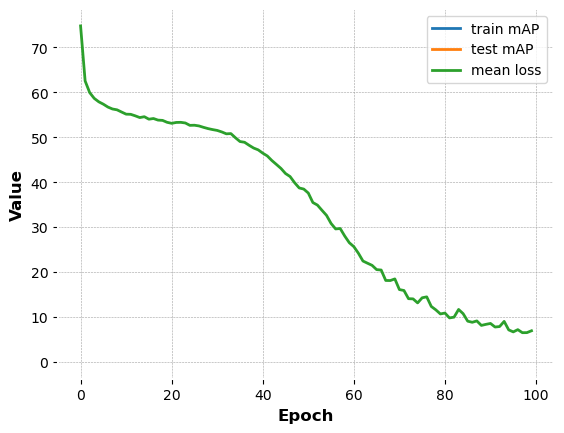

In [114]:
#  plot a line graph of the mAP history
import matplotlib.pyplot as plt

plt.plot(mAP_history, label="train mAP")
plt.plot(test_mAP_history, label="test mAP")
plt.plot(mean_loss_history, label="mean loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()


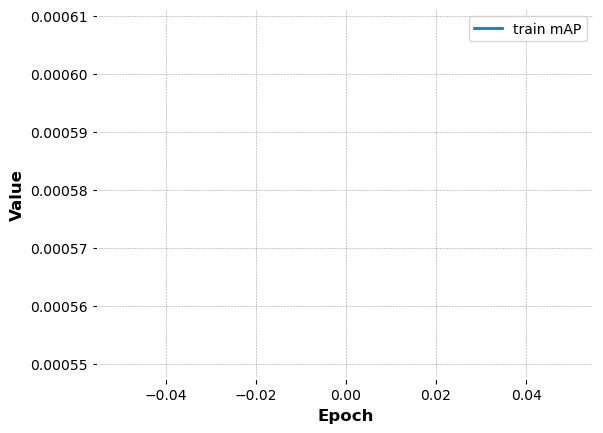

In [115]:
#  plot a line graph of the mAP history
import matplotlib.pyplot as plt

plt.plot(mAP_history, label="train mAP")
# plt.plot(test_mAP_history, label="test mAP")
# plt.plot(mean_loss_history, label="mean loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()


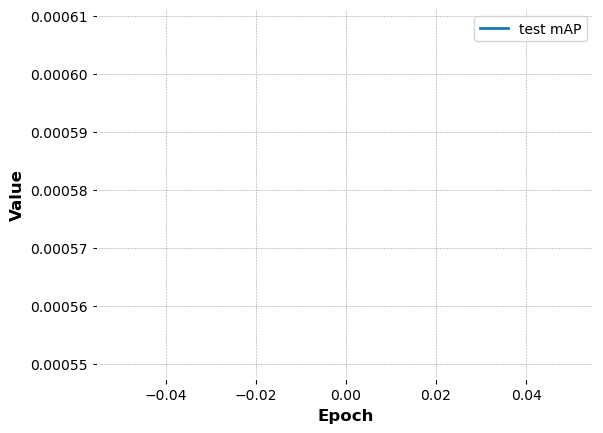

In [116]:
#  plot a line graph of the mAP history
import matplotlib.pyplot as plt

# plt.plot(mAP_history, label="train mAP")
plt.plot(test_mAP_history, label="test mAP")
# plt.plot(mean_loss_history, label="mean loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()


In [117]:
checkpoint = {
    "state_dict": model.state_dict(),
    "optimizer": optimizer.state_dict(),
}
save_checkpoint(checkpoint, filename=LOAD_MODEL_FILE)
import time
time.sleep(10)

=> Saving checkpoint


In [118]:
def load_checkpoint(checkpoint_file, model, optimizer=None):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file)  # Load the checkpoint file
    model.load_state_dict(checkpoint["state_dict"])  # Load model weights
    if optimizer:
        optimizer.load_state_dict(checkpoint["optimizer"])  # Load optimizer state (if provided)


loaded_model = load_checkpoint(LOAD_MODEL_FILE, model, optimizer)


=> Loading checkpoint


In [119]:
#  load one item from test_loader
data = next(iter(train_loader))
data

[tensor([[[ 82.1700,  86.1500,  85.1900,  ...,  77.2800,  67.8380,  58.3960],
          [ 86.1300,  87.8200,  85.3900,  ...,  77.4000,  67.9900,  58.5800],
          [ 82.1700,  84.6800,  83.2700,  ...,  75.7400,  66.4500,  57.1600],
          [ 86.0300,  85.4100,  84.0000,  ...,  76.2200,  66.9280,  57.6360]],
 
         [[ 71.4300,  56.9600,  57.3200,  ...,  61.7000,  62.4100,  44.3850],
          [ 71.6833,  57.2300,  57.7400,  ...,  62.6500,  62.6100,  44.5950],
          [ 70.6267,  56.1300,  56.9900,  ...,  61.7000,  61.7800,  43.9250],
          [ 71.3333,  57.0100,  57.1600,  ...,  62.3300,  62.4300,  44.4100]],
 
         [[144.8900, 123.8200, 102.7500,  ..., 123.0300, 122.7900, 123.9400],
          [147.9800, 125.6600, 103.3400,  ..., 124.2400, 123.7400, 124.9700],
          [144.4333, 123.1267, 101.8200,  ..., 121.6800, 121.1000, 123.6100],
          [147.4133, 124.8667, 102.3200,  ..., 122.8400, 123.6100, 124.8500]],
 
         ...,
 
         [[139.6058, 132.6417, 125.6775

In [120]:
from matplotlib import pyplot as plt
import mplfinance as mpf

pattern_encoding = {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
# Assuming pattern_encoding dictionary is available
pattern_encoding_inv = pattern_encoding
pattern_encoding_inv = {v: k for k, v in pattern_encoding_inv.items()}
# Colors for the patterns
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'black', 'pink']


def plot_image(ohcl_data, boxes ):
    
    # Transpose the tensor to make it [224, 4] and move to CPU
    tensor_transposed = ohcl_data.T.cpu()

    # Convert to a pandas DataFrame
    ohcl_data = pd.DataFrame(tensor_transposed.numpy(), columns=['Open', 'High', 'Low', 'Close'])
    
    # Create a candlestick plot using mplfinance
    ohlc_for_mpf = ohcl_data[['Open', 'High', 'Low', 'Close']].copy()
    ohlc_for_mpf.index = pd.to_datetime(ohcl_data.index)
    
    # Create the base plot (this returns a figure and axes)
    fig, axes = mpf.plot(ohlc_for_mpf, type='candle', style='charles', title=f'OHLC Chart with Patterns',
                         ylabel='Price', figsize=(12, 6), returnfig=True)  # Set figsize here
    
    ax = axes[0]  # Access the first (and only) axis object
    
    # Patterns data for the current instance
    # patters = boxes
    
    # Loop through the patterns and highlight them on the chart
    color_index = 0
    # for index, row in patters.iterrows():
    for box in boxes:   
        pattern_center = box[2]
        pattern_width = box[3]
        pattern_label = pattern_encoding_inv[box[0]]
        
        # Calculate pattern start and end positions (scaled for the width)
        pattern_start = (pattern_center - pattern_width/2) * len(ohlc_for_mpf)
        pattern_end = (pattern_center + pattern_width/2) * len(ohlc_for_mpf)
        
        # Add a vertical span (highlight the pattern) to the chart
        ax.axvspan(pattern_start, pattern_end, color=colors[color_index], alpha=0.2, label=pattern_label)
        color_index += 1

    # Customize the chart with grid, labels, and legend
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Patterns")
    
    # Show the chart
    plt.show()

 predicted patterns


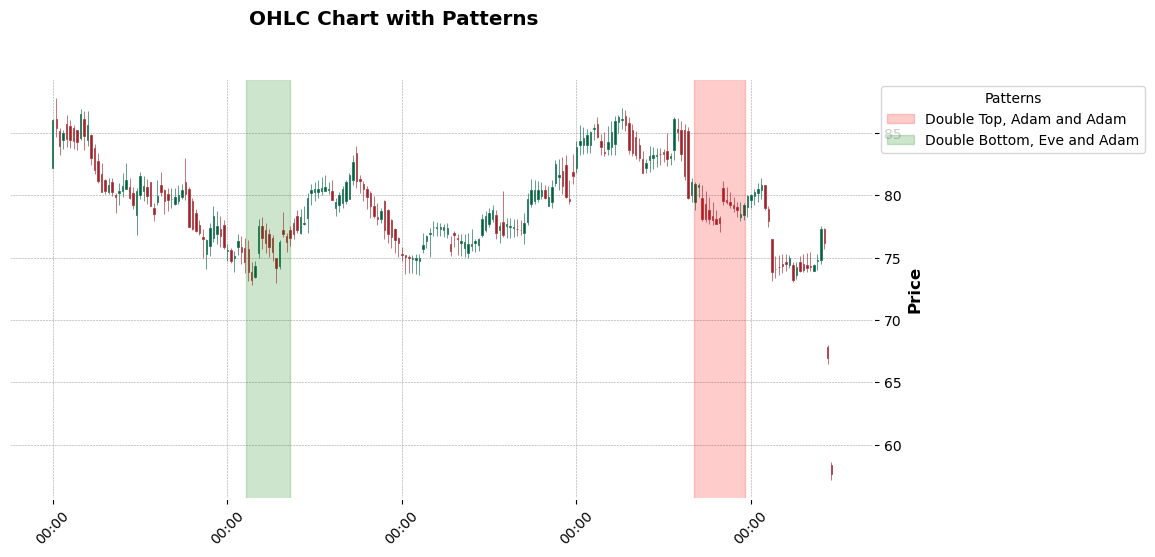

[[0.0, 1.1652697324752808, 0.852148711681366, 0.06527431309223175], [2.0, 1.1062909364700317, 0.27560290694236755, 0.056599684059619904]]
Real Patterns


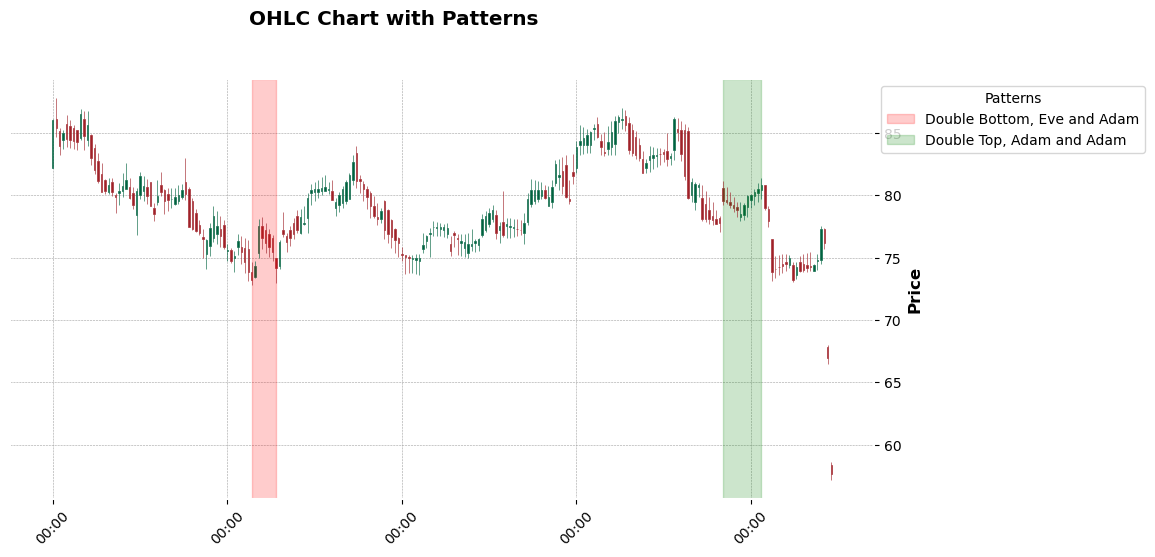

[[0.0, 1.1652697324752808, 0.852148711681366, 0.06527431309223175], [2.0, 1.1062909364700317, 0.27560290694236755, 0.056599684059619904]]
 predicted patterns


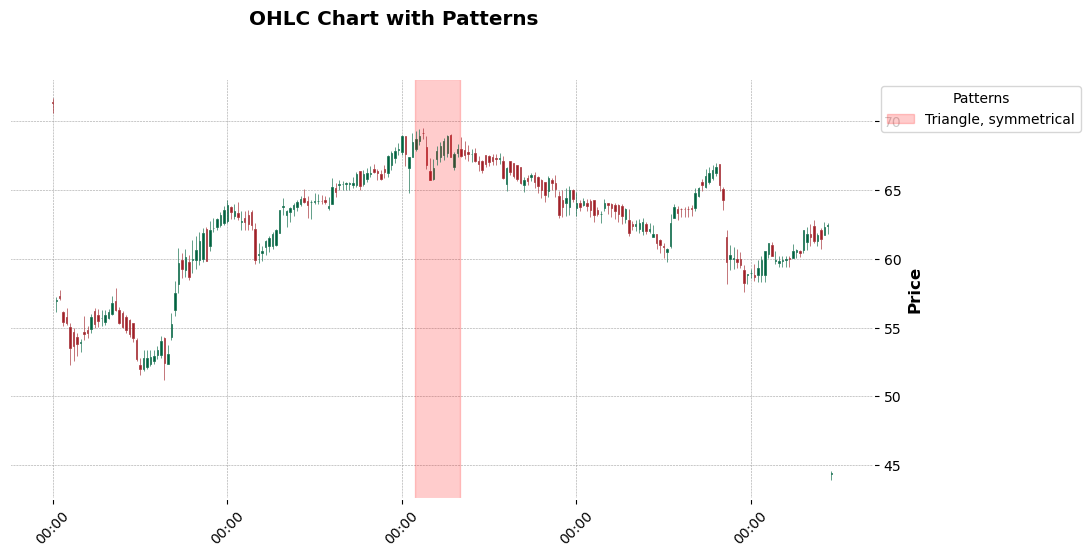

[[1.0, 0.9973400235176086, 0.4915781319141388, 0.05731966346502304]]
Real Patterns


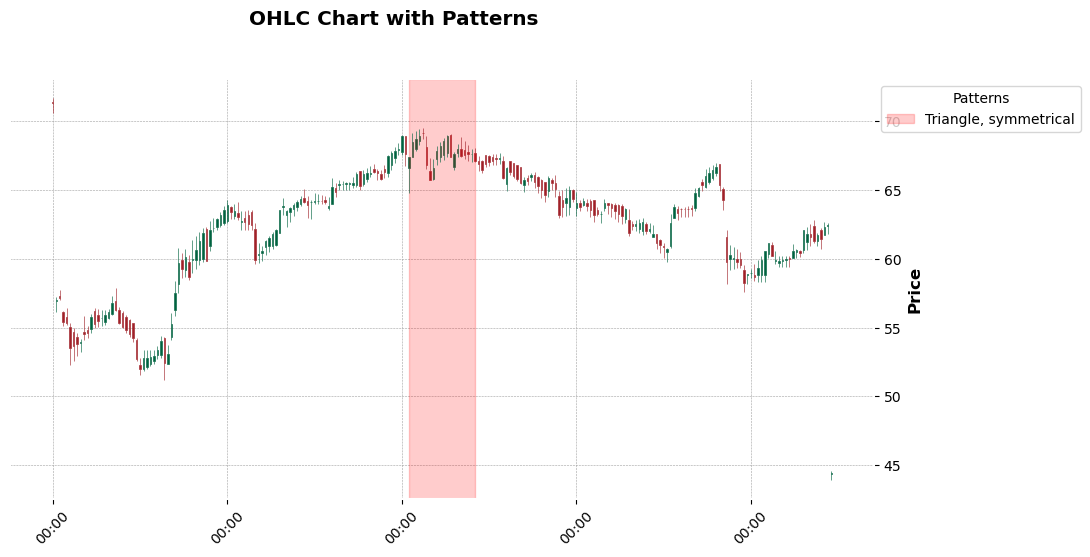

[[1.0, 0.9973400235176086, 0.4915781319141388, 0.05731966346502304]]
 predicted patterns


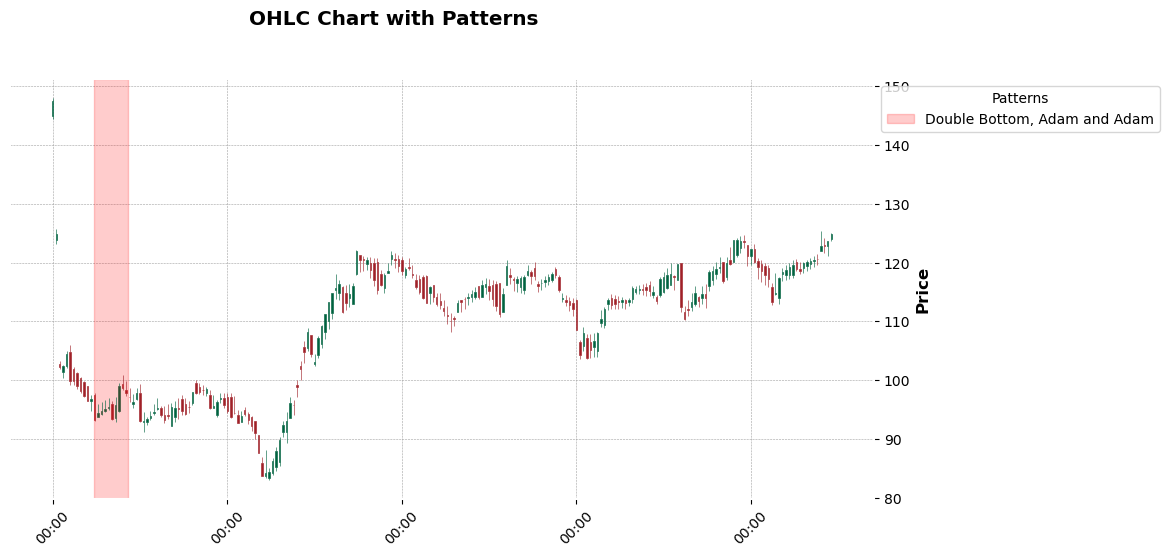

[[4.0, 0.9471964240074158, 0.07450765371322632, 0.043978843837976456]]
Real Patterns


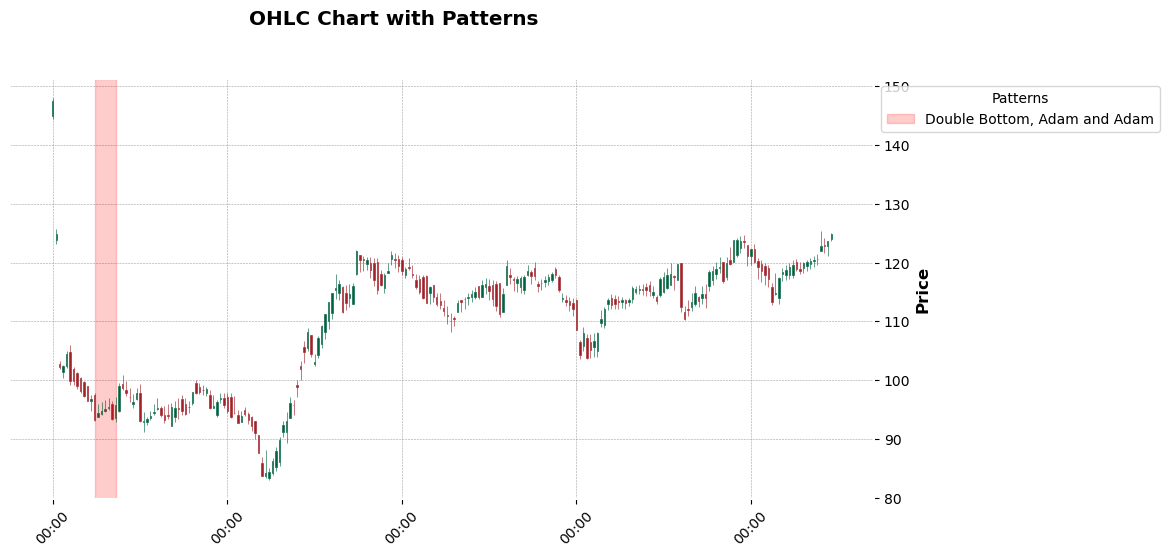

[[4.0, 0.9471964240074158, 0.07450765371322632, 0.043978843837976456]]
 predicted patterns


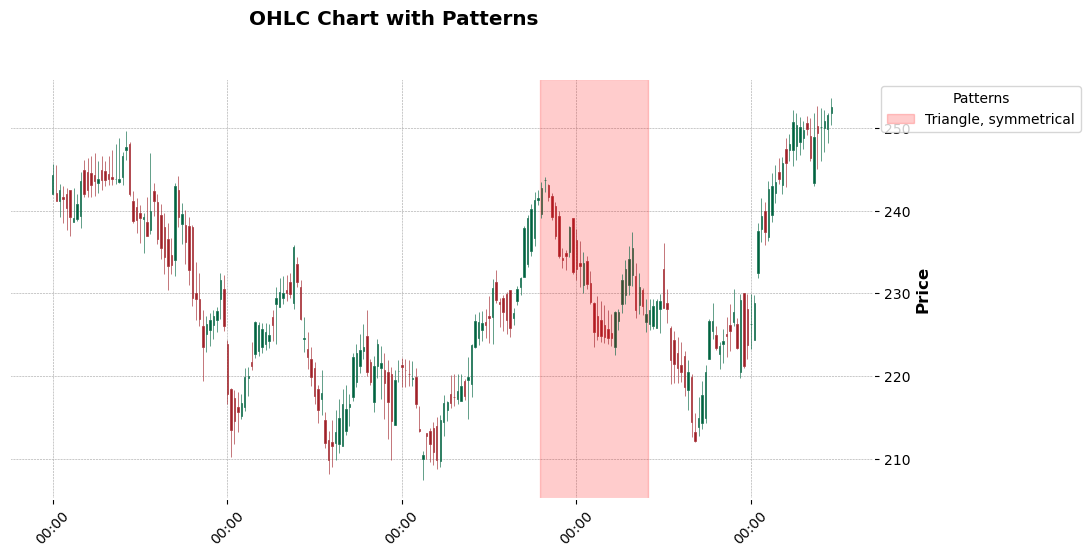

[[1.0, 1.0145827531814575, 0.6924578547477722, 0.1383821666240692]]
Real Patterns


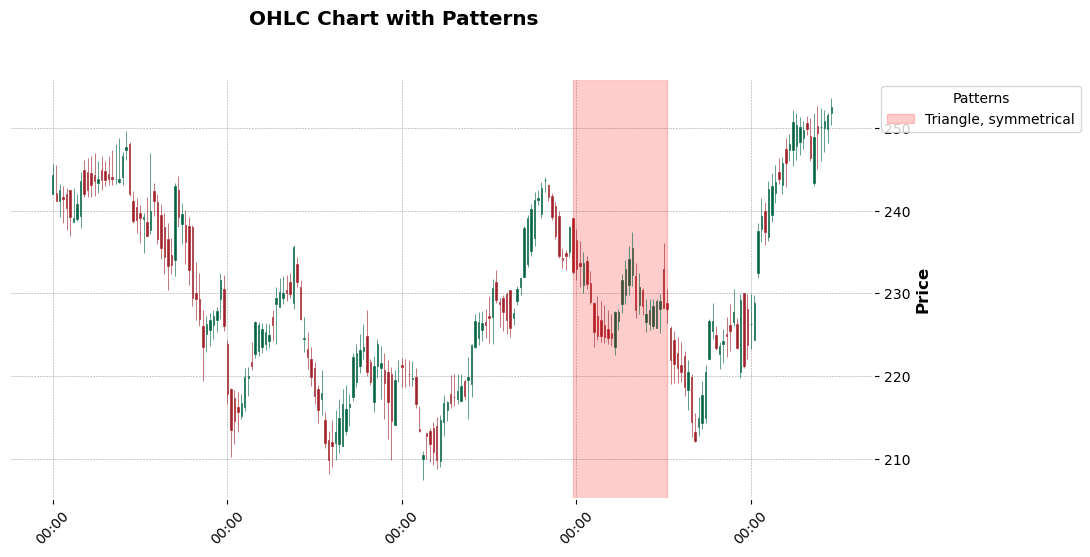

[[1.0, 1.0145827531814575, 0.6924578547477722, 0.1383821666240692]]
 predicted patterns


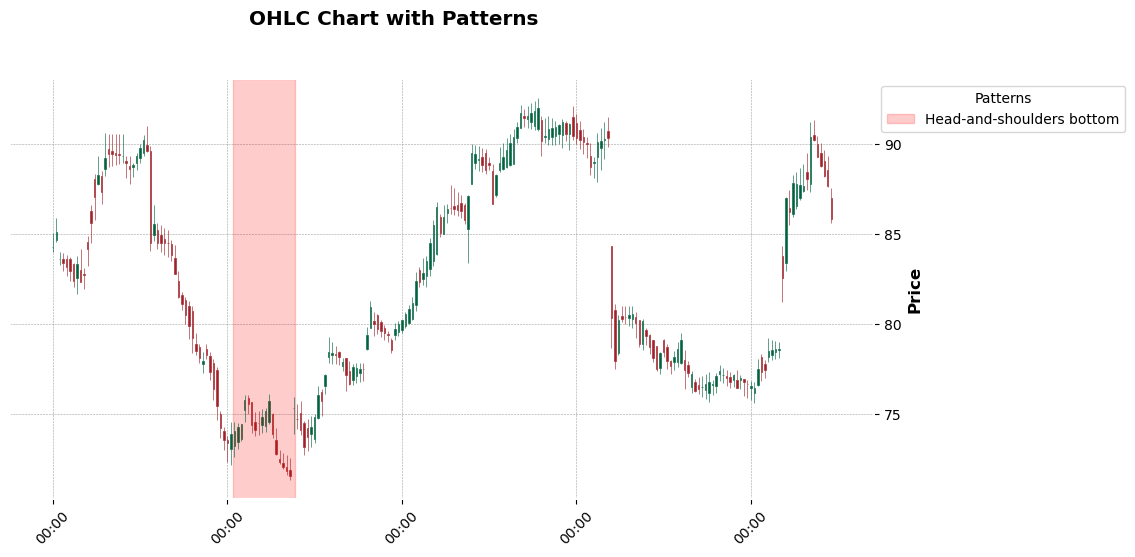

[[5.0, 1.0616397857666016, 0.2705093026161194, 0.07897615432739258]]
Real Patterns


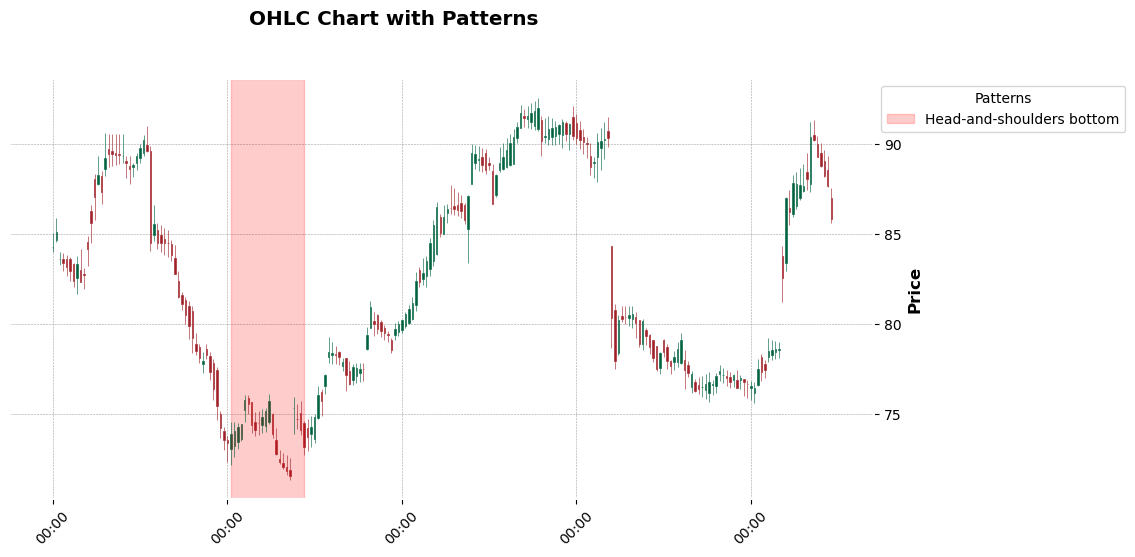

[[5.0, 1.0616397857666016, 0.2705093026161194, 0.07897615432739258]]
 predicted patterns


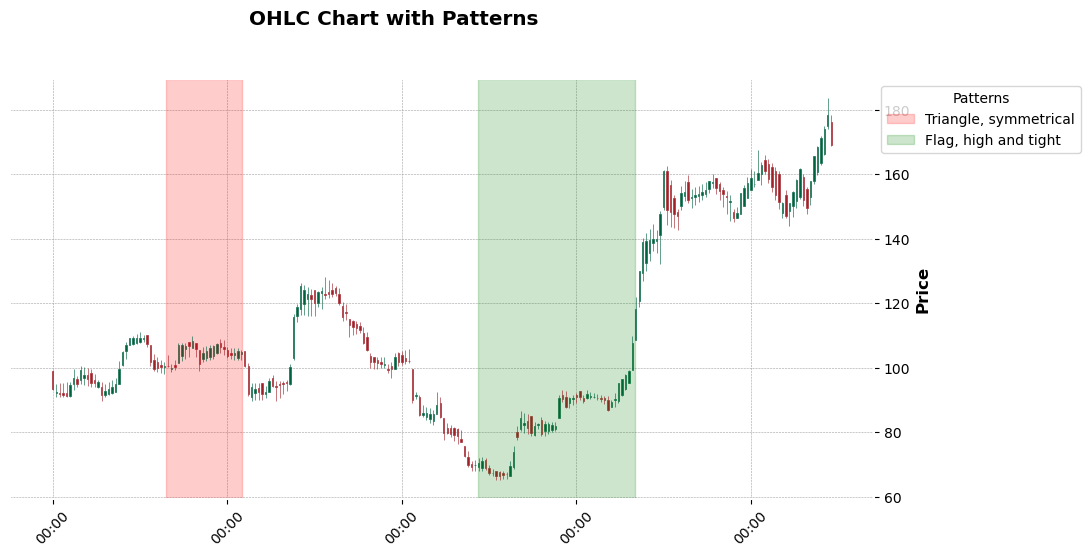

[[1.0, 0.9280206561088562, 0.19283826649188995, 0.0972210243344307], [6.0, 0.8335468173027039, 0.6440207958221436, 0.2016066014766693]]
Real Patterns


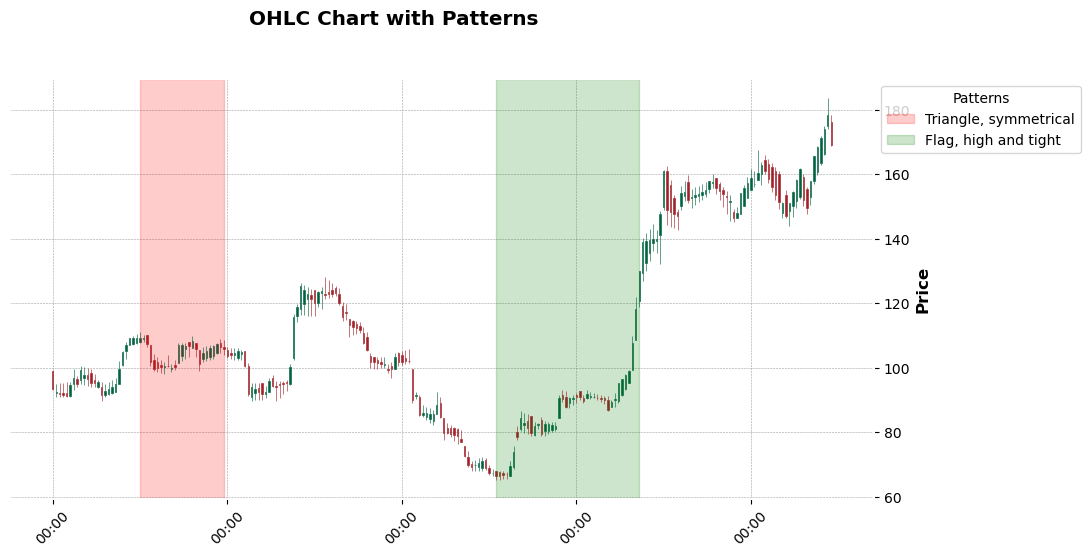

[[1.0, 0.9280206561088562, 0.19283826649188995, 0.0972210243344307], [6.0, 0.8335468173027039, 0.6440207958221436, 0.2016066014766693]]
 predicted patterns


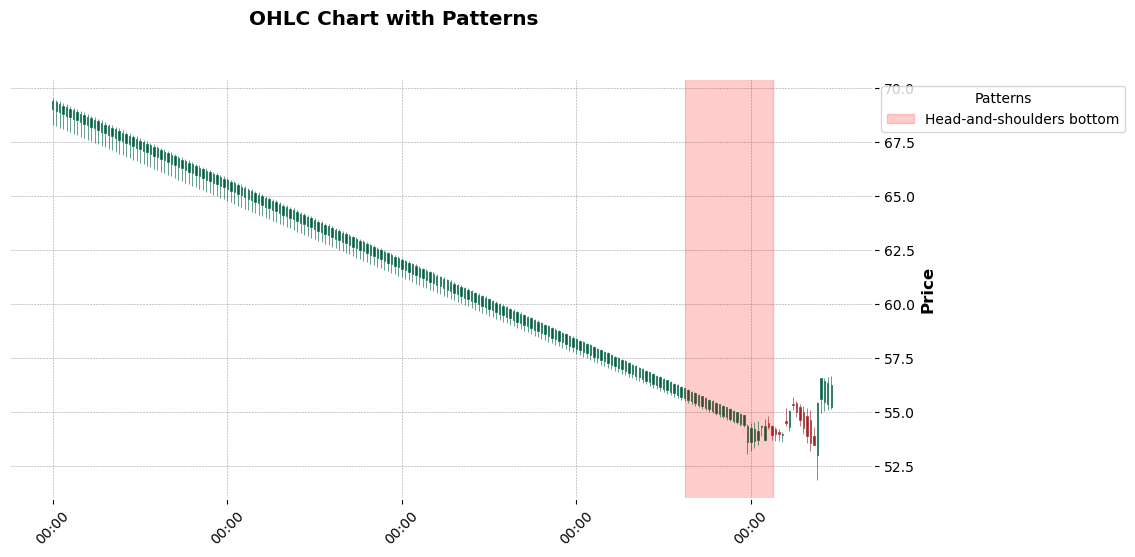

[[5.0, 0.7144632935523987, 0.864696741104126, 0.11216703057289124]]
Real Patterns


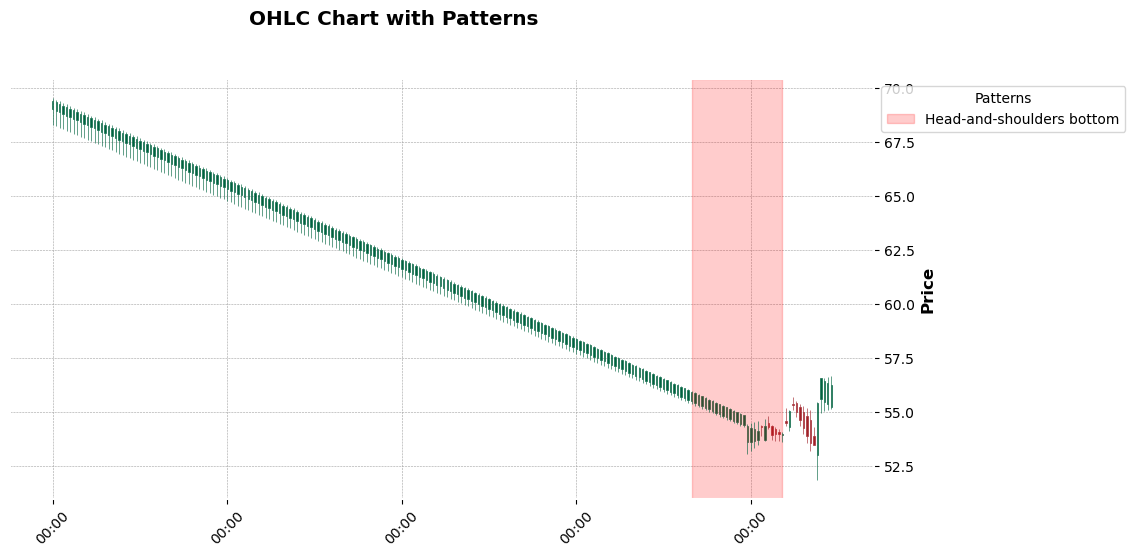

[[5.0, 0.7144632935523987, 0.864696741104126, 0.11216703057289124]]
 predicted patterns


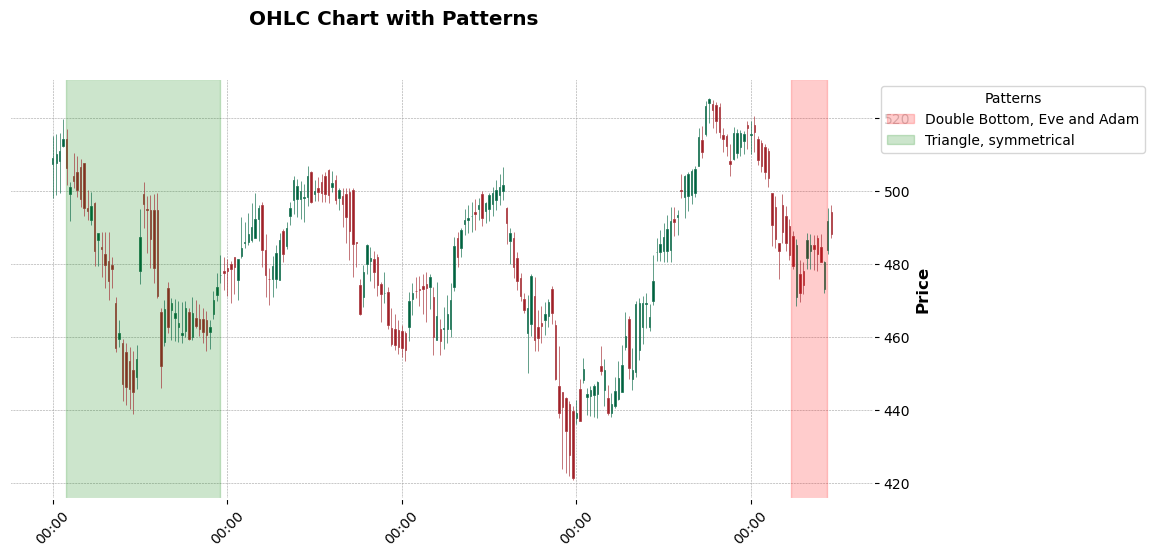

[[2.0, 1.02309250831604, 0.9667335152626038, 0.045918453484773636], [1.0, 1.0033628940582275, 0.11553671956062317, 0.1976138949394226]]
Real Patterns


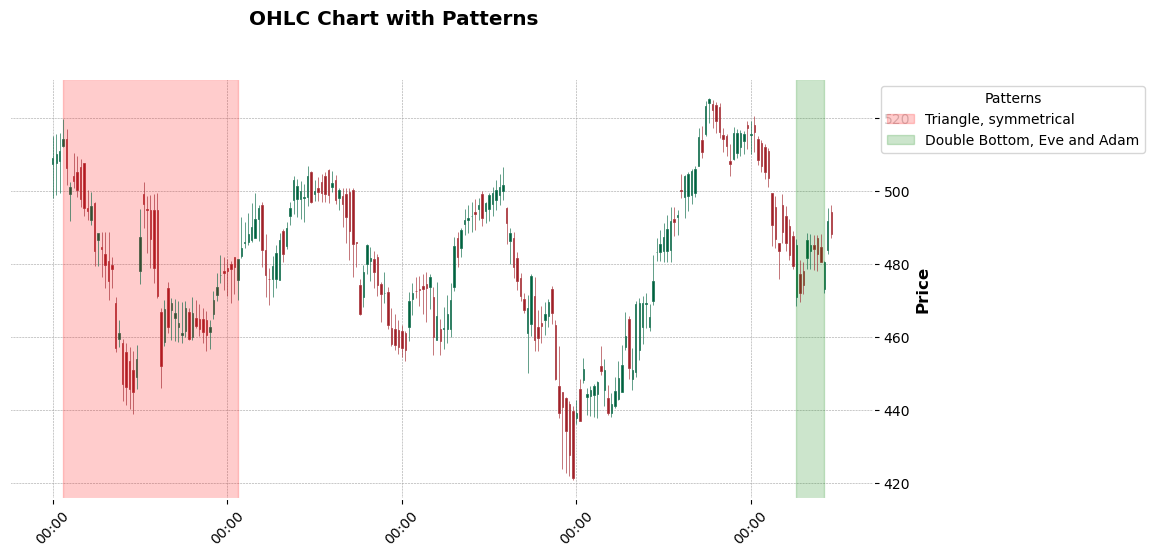

[[2.0, 1.02309250831604, 0.9667335152626038, 0.045918453484773636], [1.0, 1.0033628940582275, 0.11553671956062317, 0.1976138949394226]]
 predicted patterns


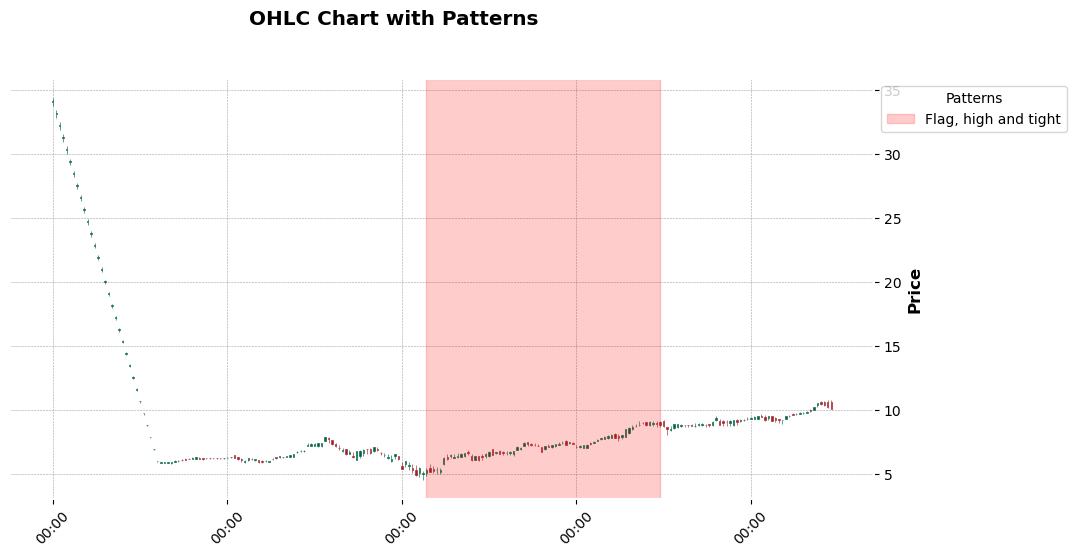

[[6.0, 1.0098187923431396, 0.6268973350524902, 0.3004089295864105]]
Real Patterns


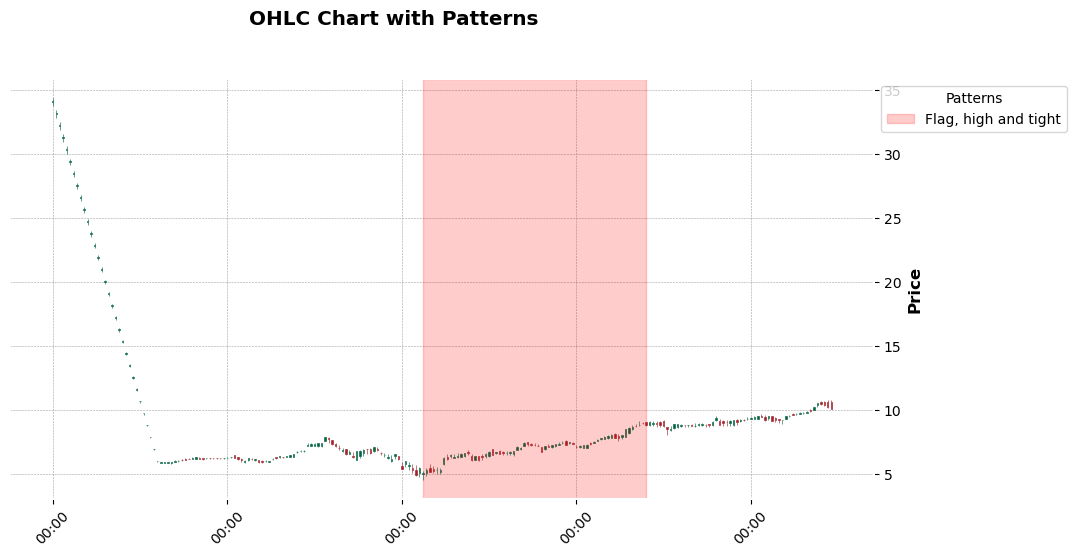

[[6.0, 1.0098187923431396, 0.6268973350524902, 0.3004089295864105]]
 predicted patterns


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000018D6D41DDA0>
Traceback (most recent call last):
  File "c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\torch\utils\data\dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\torch\utils\data\dataloader.py", line 1576, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


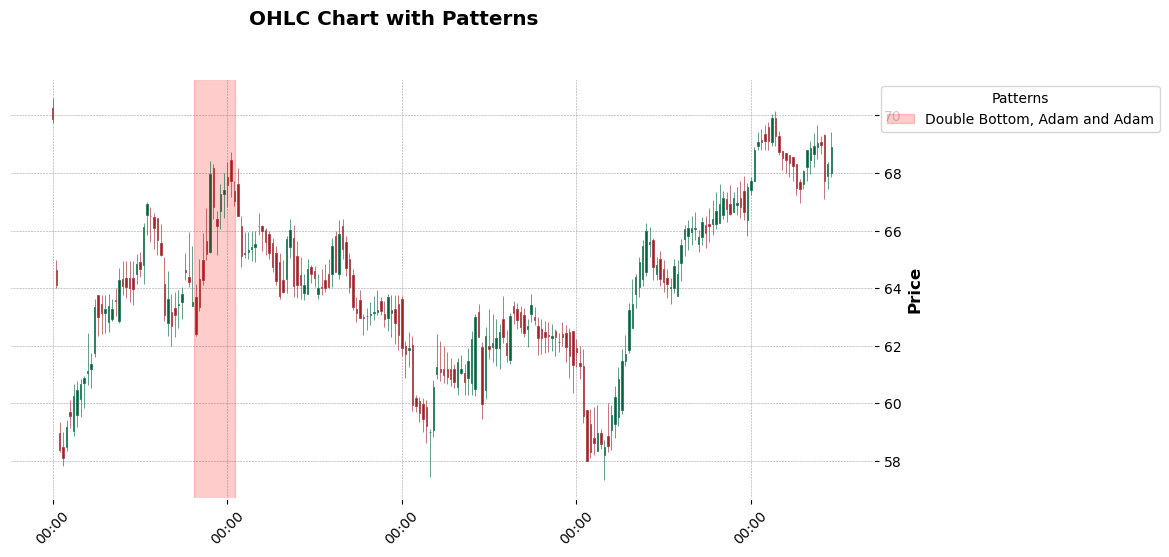

[[4.0, 1.0418208837509155, 0.20652176439762115, 0.05210350081324577]]
Real Patterns


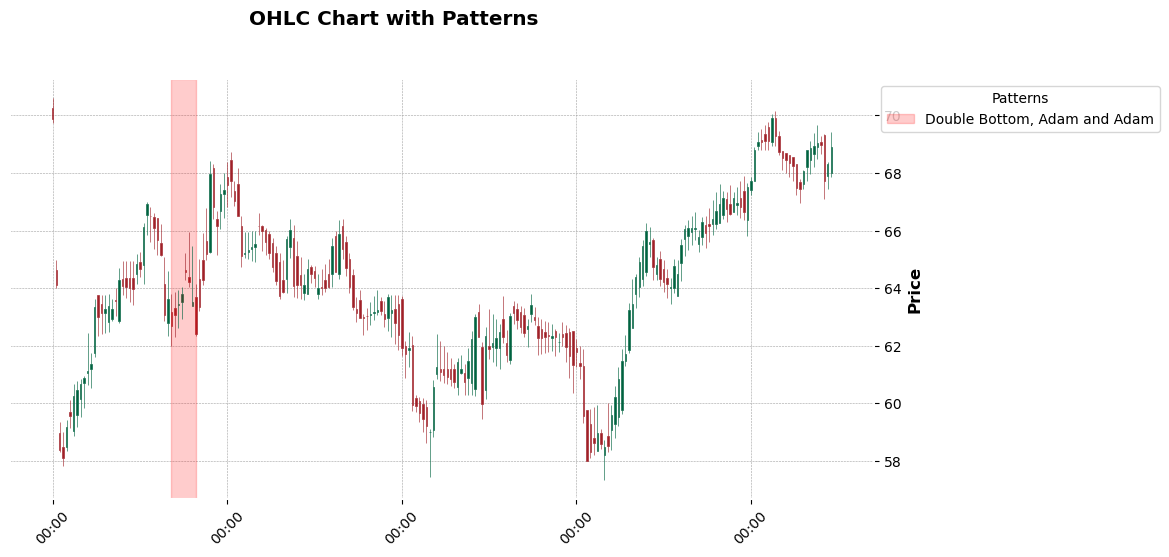

[[4.0, 1.0418208837509155, 0.20652176439762115, 0.05210350081324577]]


In [121]:
x= data[0] # get the ohcl data
lable = data[1]
x = x.to(DEVICE)
lable = lable.to(DEVICE)
for idx in range(10):
    bboxes = cellboxes_to_boxes(model(x))
    bboxes = non_max_suppression(bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
    # plot_image(x[idx].permute(1,2,0).to("cpu"), bboxes)
    print(" predicted patterns")
    plot_image(x[idx], bboxes)
    print(bboxes)
    
    
    lable_bboxes = cellboxes_to_boxes(lable)
    lable_bboxes = non_max_suppression(lable_bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
    print ("Real Patterns")
    plot_image(x[idx], lable_bboxes)
    print(bboxes)

# import sys
# sys.exit()

In [122]:
test_data = next(iter(test_loader))

 predicted patterns


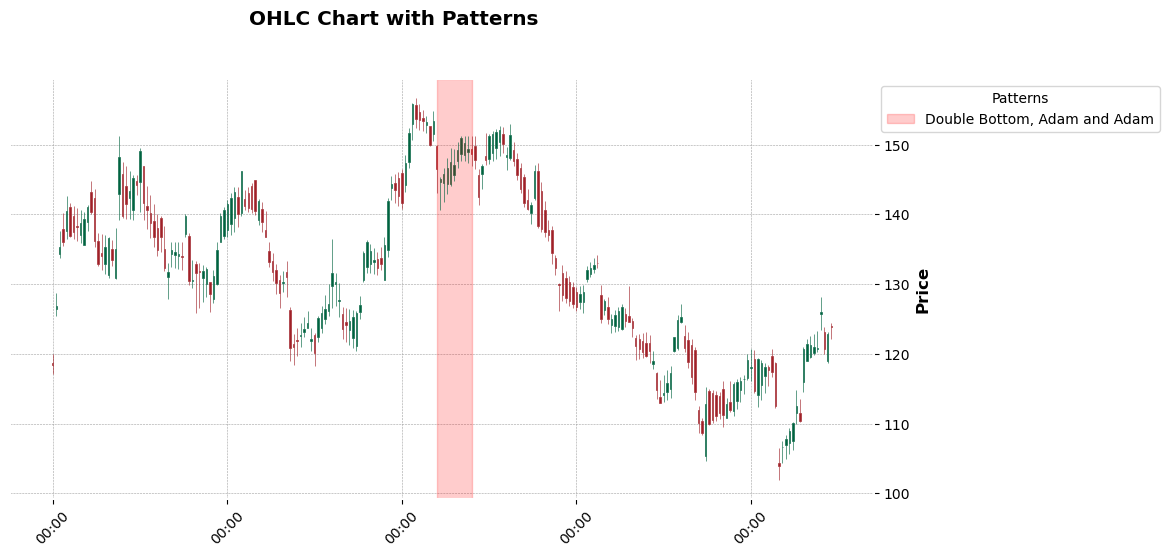

[[4.0, 0.9155031442642212, 0.5138622522354126, 0.04512280970811844]]
Real Patterns


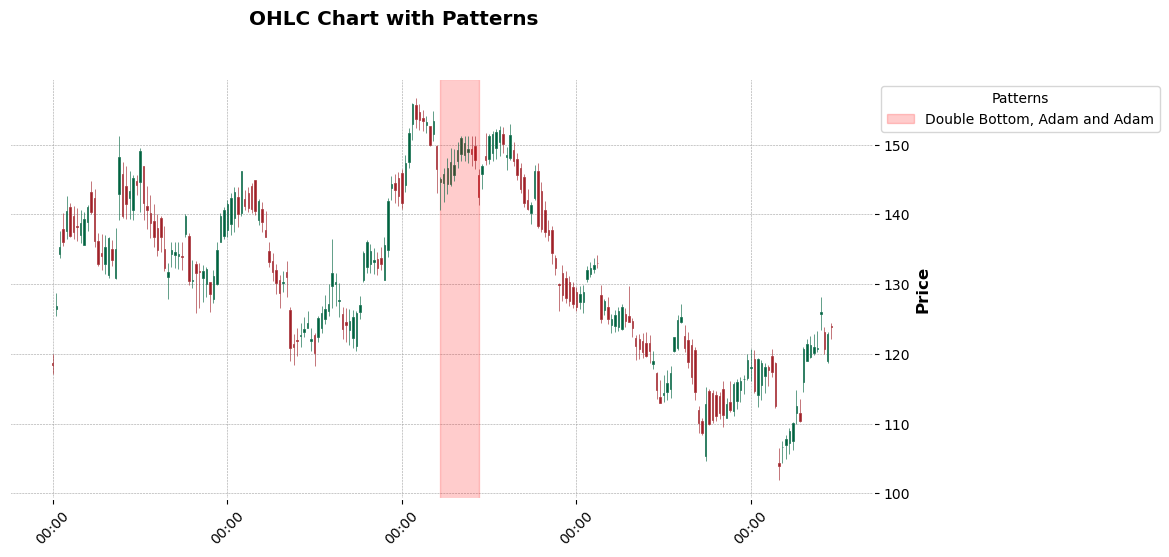

[[4.0, 0.9155031442642212, 0.5138622522354126, 0.04512280970811844]]
 predicted patterns


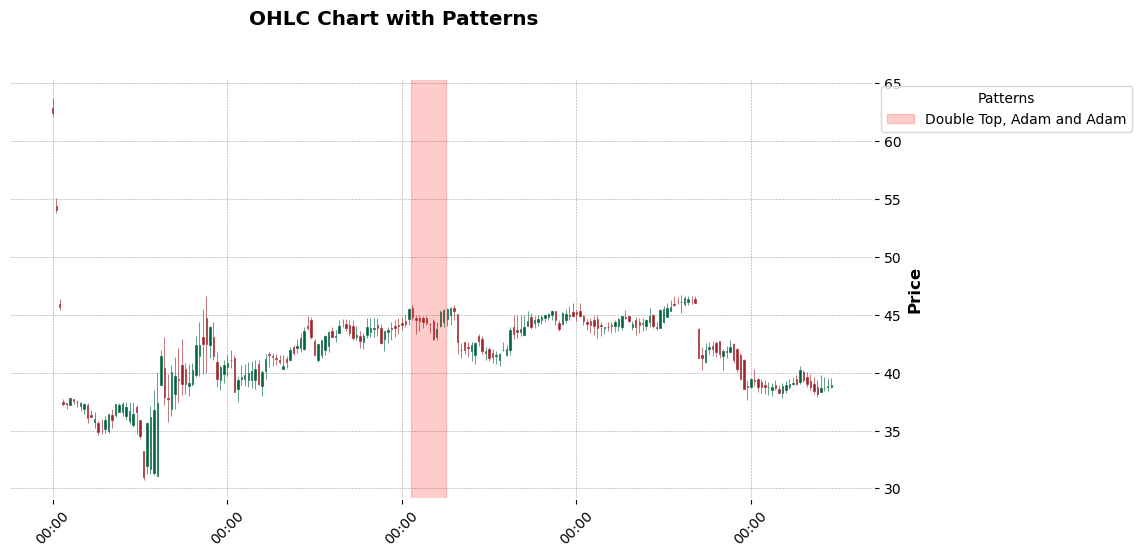

[[0.0, 0.9133667945861816, 0.48092120885849, 0.044894084334373474]]
Real Patterns


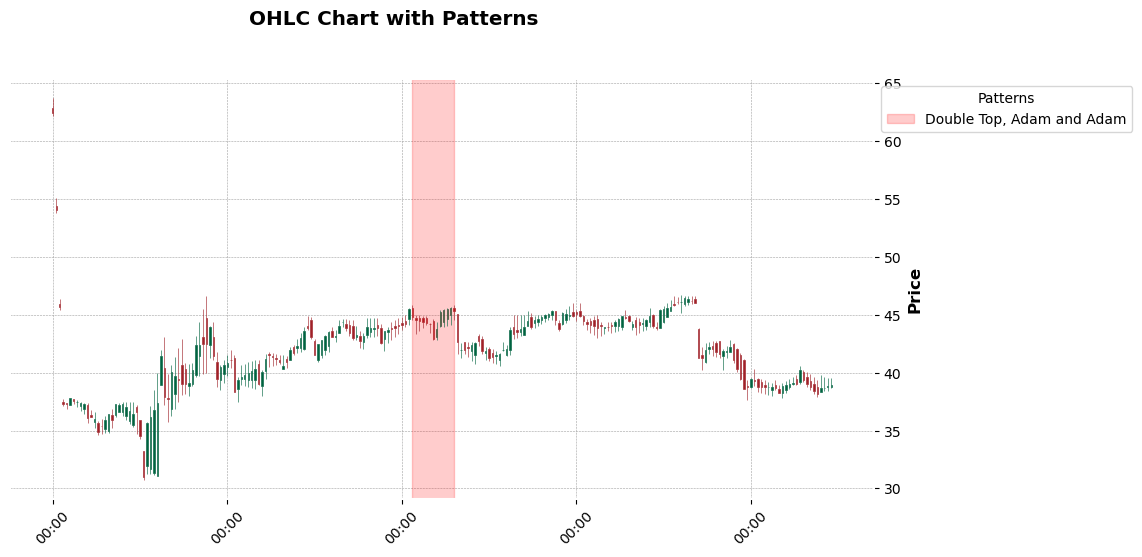

[[0.0, 0.9133667945861816, 0.48092120885849, 0.044894084334373474]]
 predicted patterns


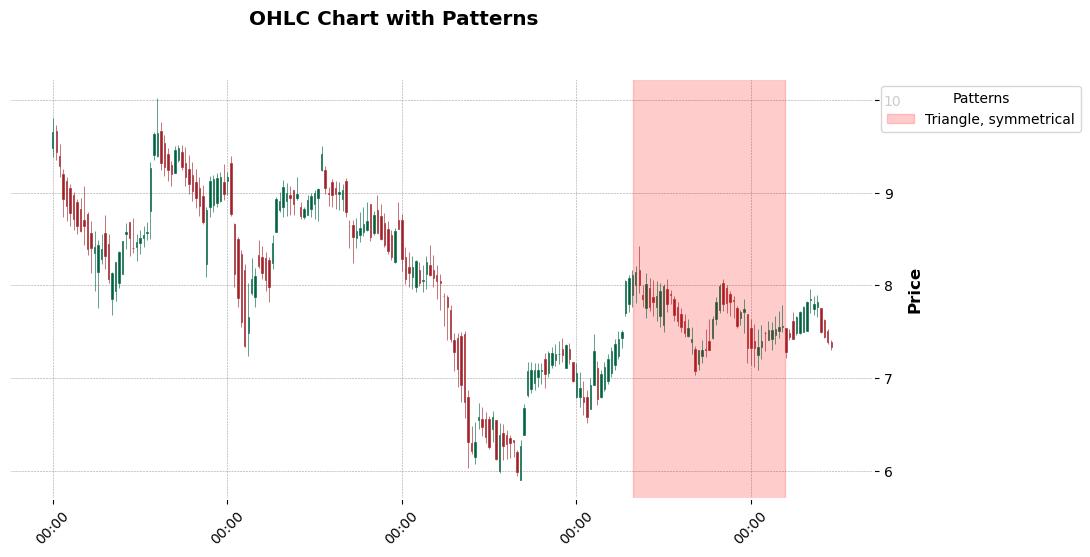

[[1.0, 0.97041916847229, 0.8393622040748596, 0.19437117874622345]]
Real Patterns


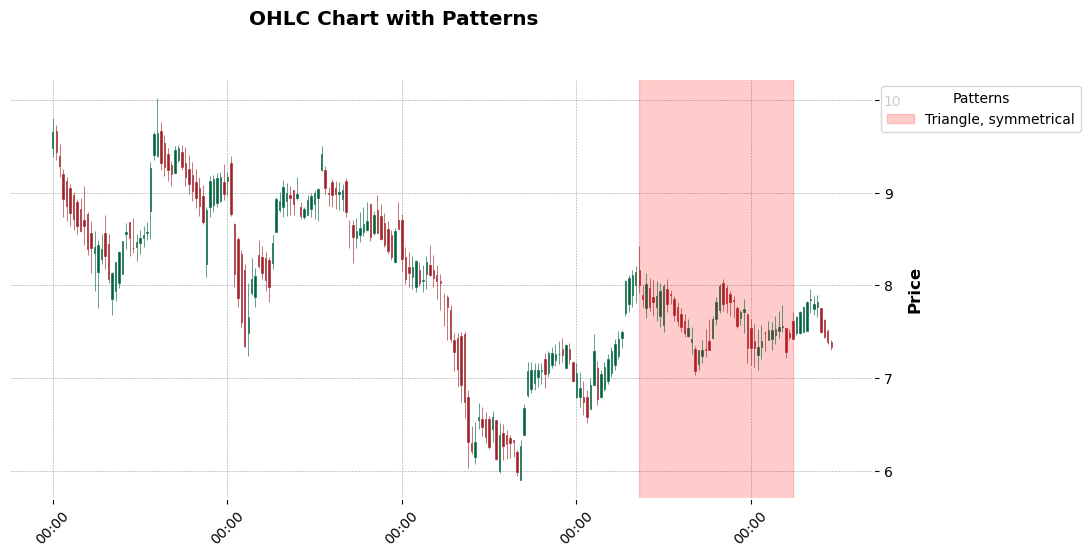

[[1.0, 0.97041916847229, 0.8393622040748596, 0.19437117874622345]]
 predicted patterns


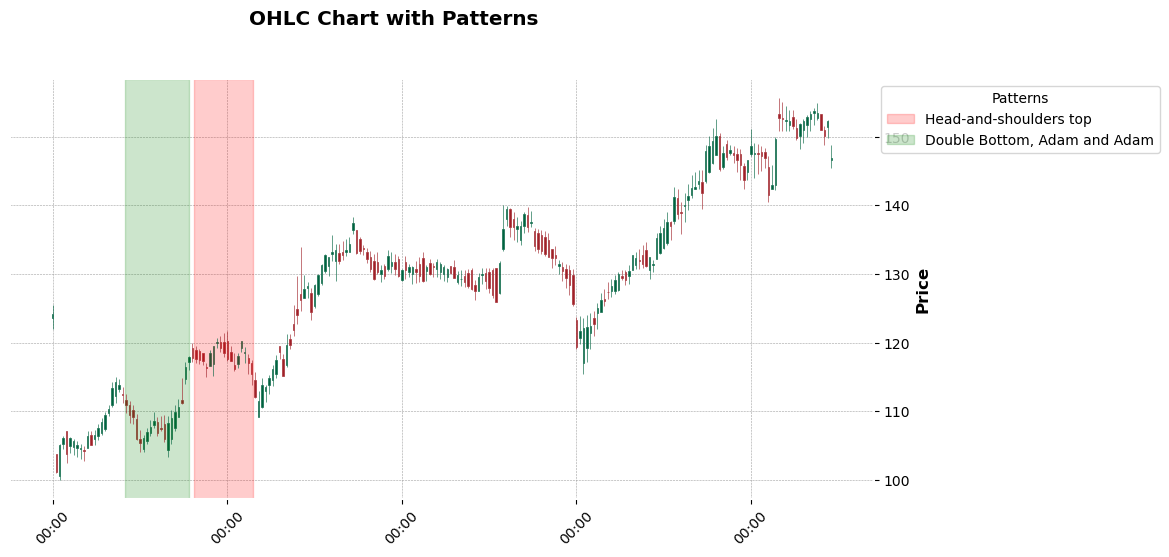

[[3.0, 1.0498082637786865, 0.2180599570274353, 0.07592587172985077], [4.0, 0.7376307249069214, 0.1331629753112793, 0.08235123008489609]]
Real Patterns


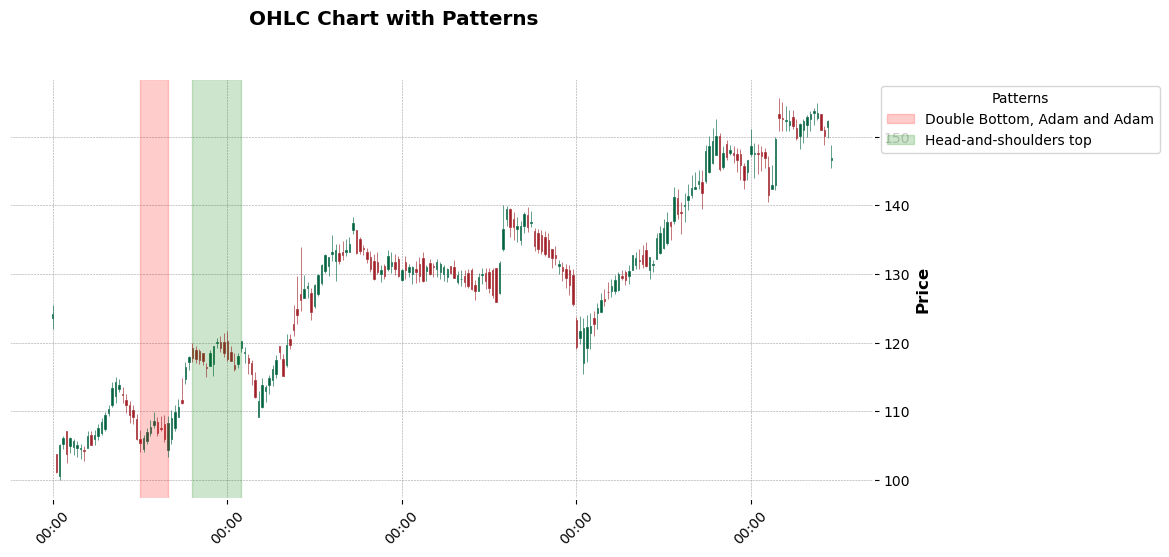

[[3.0, 1.0498082637786865, 0.2180599570274353, 0.07592587172985077], [4.0, 0.7376307249069214, 0.1331629753112793, 0.08235123008489609]]
 predicted patterns


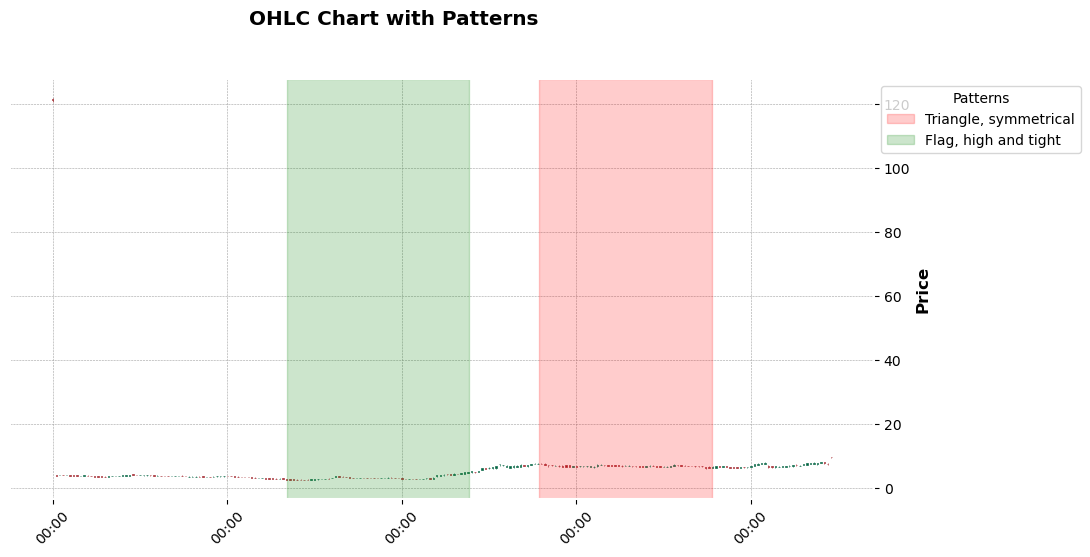

[[1.0, 1.1266213655471802, 0.7323967218399048, 0.2205737978219986], [6.0, 1.0904868841171265, 0.4156009554862976, 0.23301641643047333]]
Real Patterns


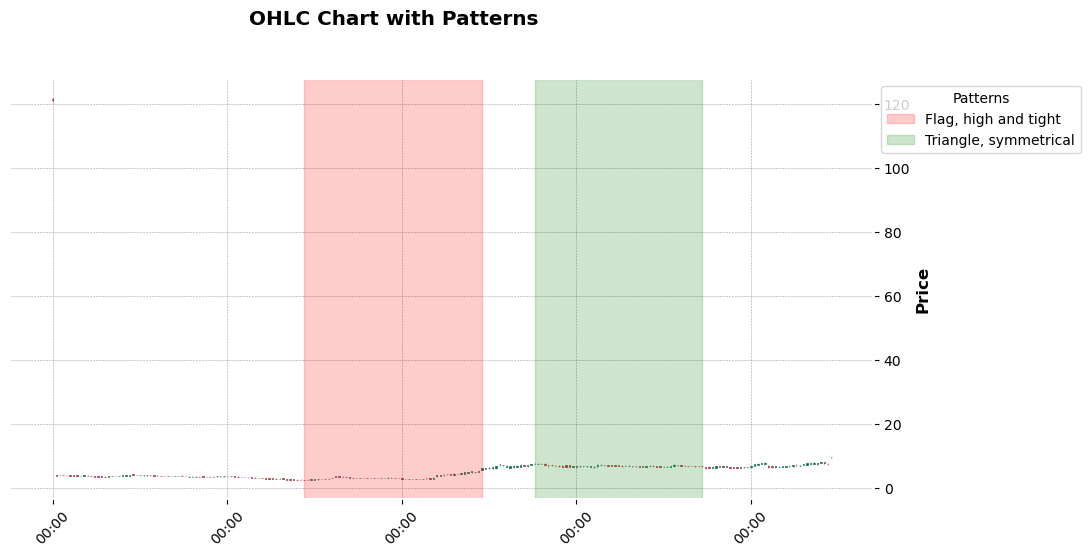

[[1.0, 1.1266213655471802, 0.7323967218399048, 0.2205737978219986], [6.0, 1.0904868841171265, 0.4156009554862976, 0.23301641643047333]]
 predicted patterns


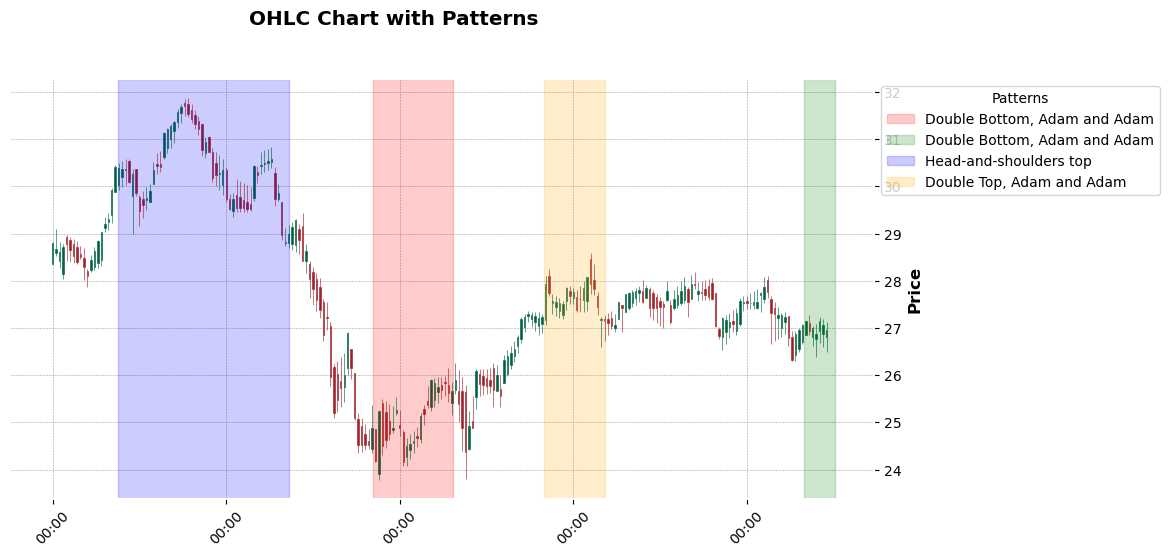

[[4.0, 0.8855544328689575, 0.46397292613983154, 0.10316552966833115], [4.0, 0.8739983439445496, 0.9865317940711975, 0.03891734033823013], [3.0, 0.8479918837547302, 0.19396458566188812, 0.22041328251361847], [0.0, 0.826202929019928, 0.670781672000885, 0.07807932794094086]]
Real Patterns


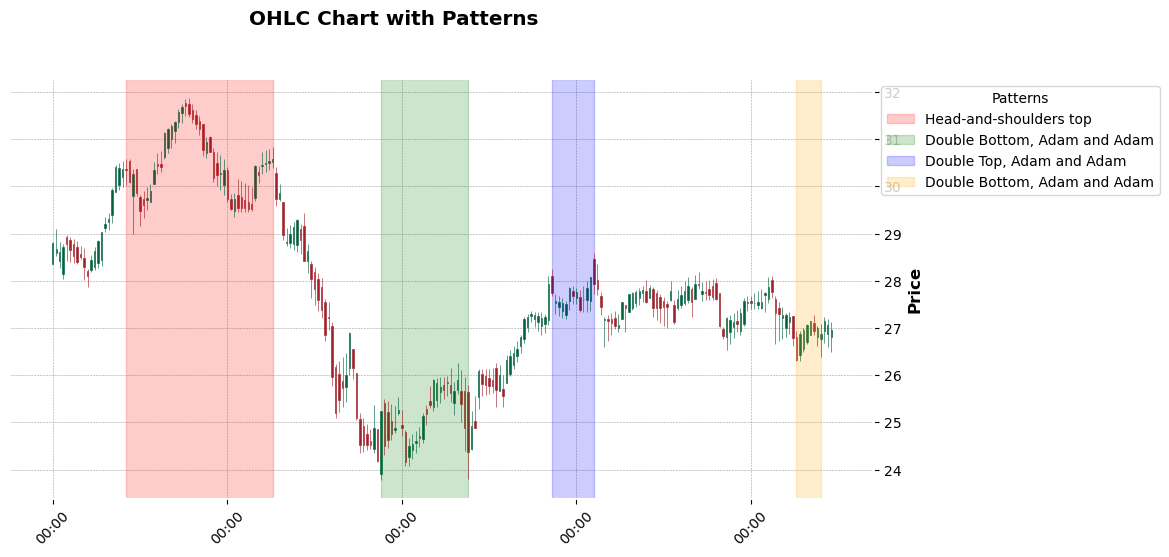

[[4.0, 0.8855544328689575, 0.46397292613983154, 0.10316552966833115], [4.0, 0.8739983439445496, 0.9865317940711975, 0.03891734033823013], [3.0, 0.8479918837547302, 0.19396458566188812, 0.22041328251361847], [0.0, 0.826202929019928, 0.670781672000885, 0.07807932794094086]]
 predicted patterns


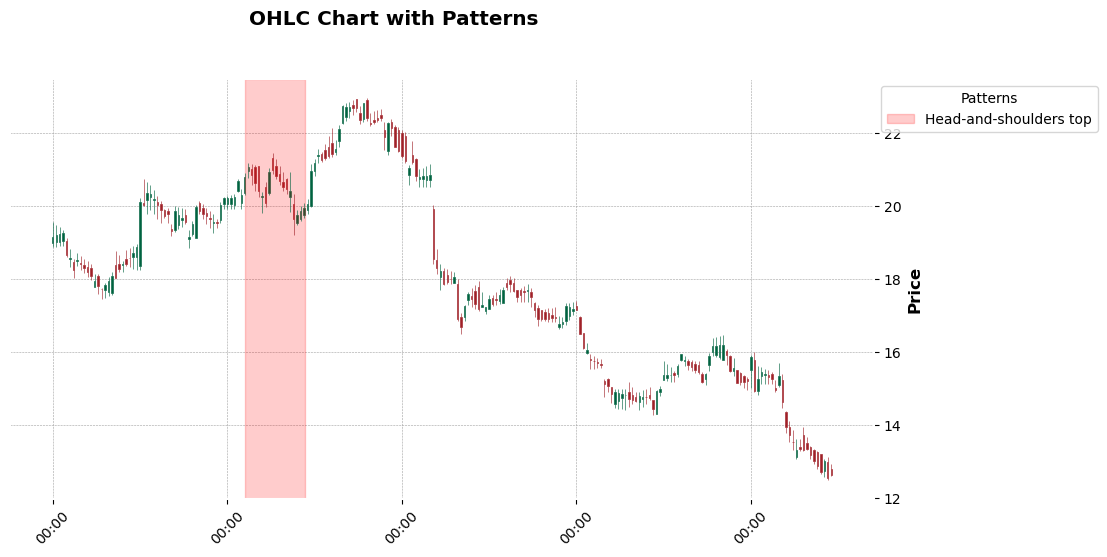

[[3.0, 1.0577807426452637, 0.2841380536556244, 0.07693102210760117]]
Real Patterns


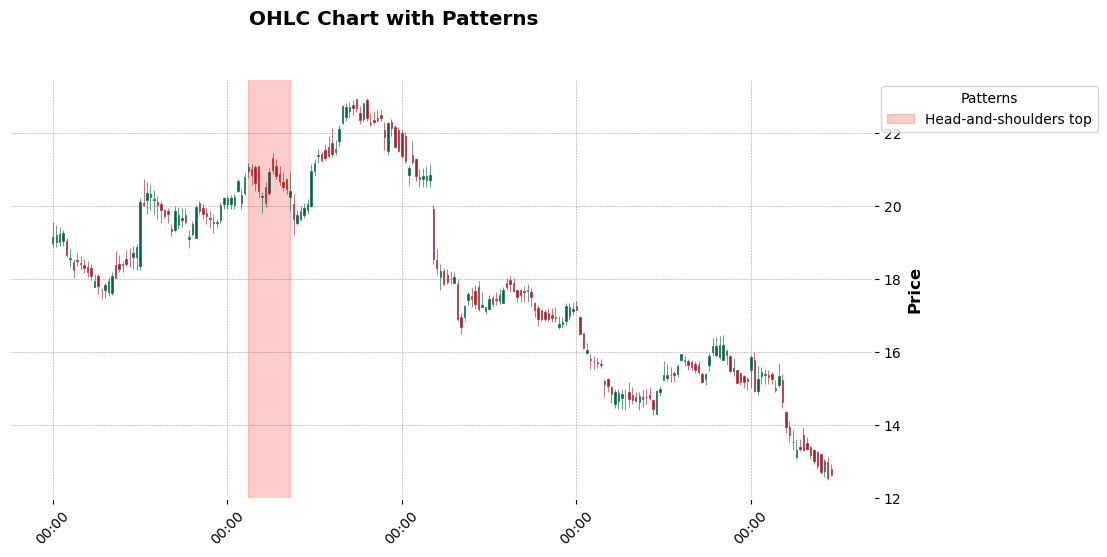

[[3.0, 1.0577807426452637, 0.2841380536556244, 0.07693102210760117]]
 predicted patterns


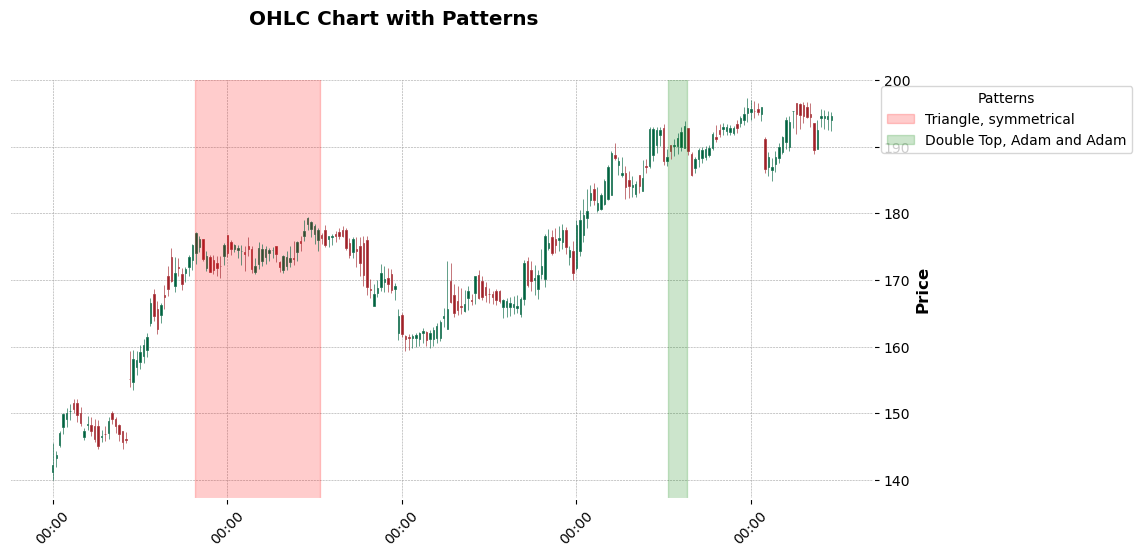

[[1.0, 0.9291515350341797, 0.2617707848548889, 0.16066163778305054], [0.0, 0.8777506947517395, 0.7984930276870728, 0.02411658689379692]]
Real Patterns


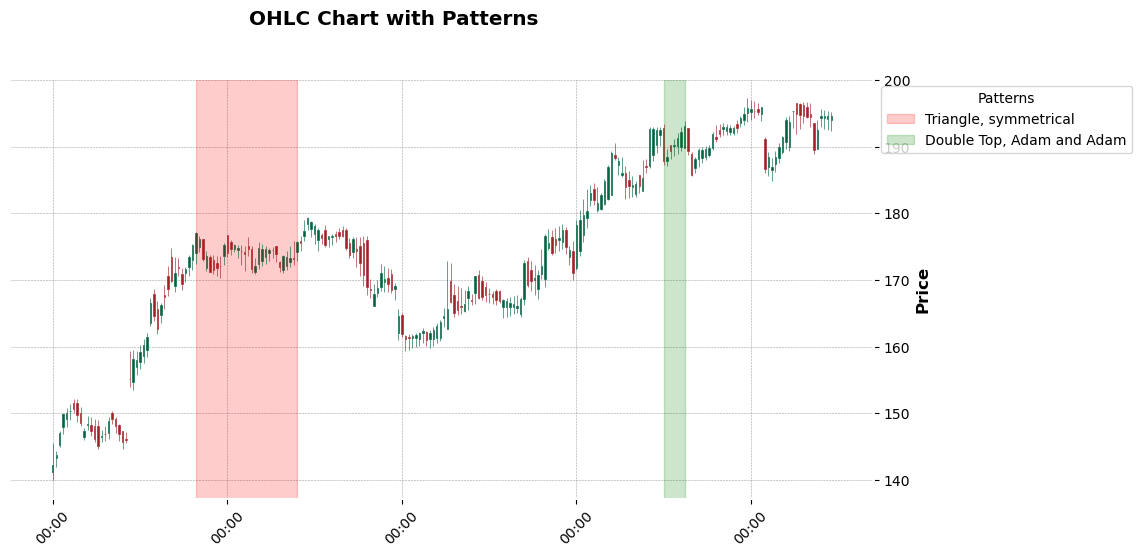

[[1.0, 0.9291515350341797, 0.2617707848548889, 0.16066163778305054], [0.0, 0.8777506947517395, 0.7984930276870728, 0.02411658689379692]]
 predicted patterns


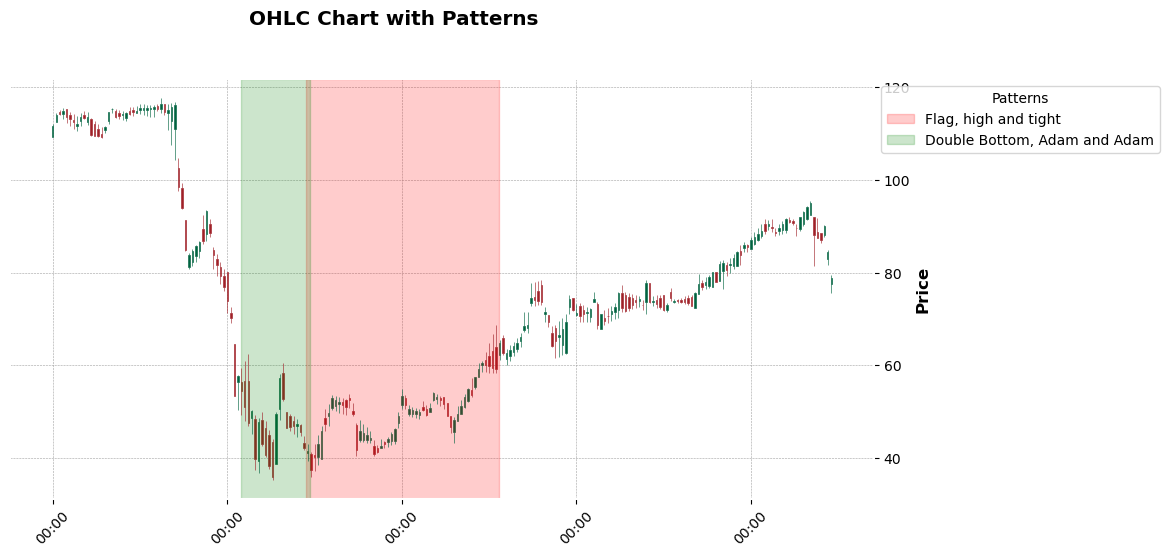

[[6.0, 0.9891744256019592, 0.44691333174705505, 0.2462296038866043], [4.0, 0.9480798244476318, 0.2847805619239807, 0.08794227987527847]]
Real Patterns


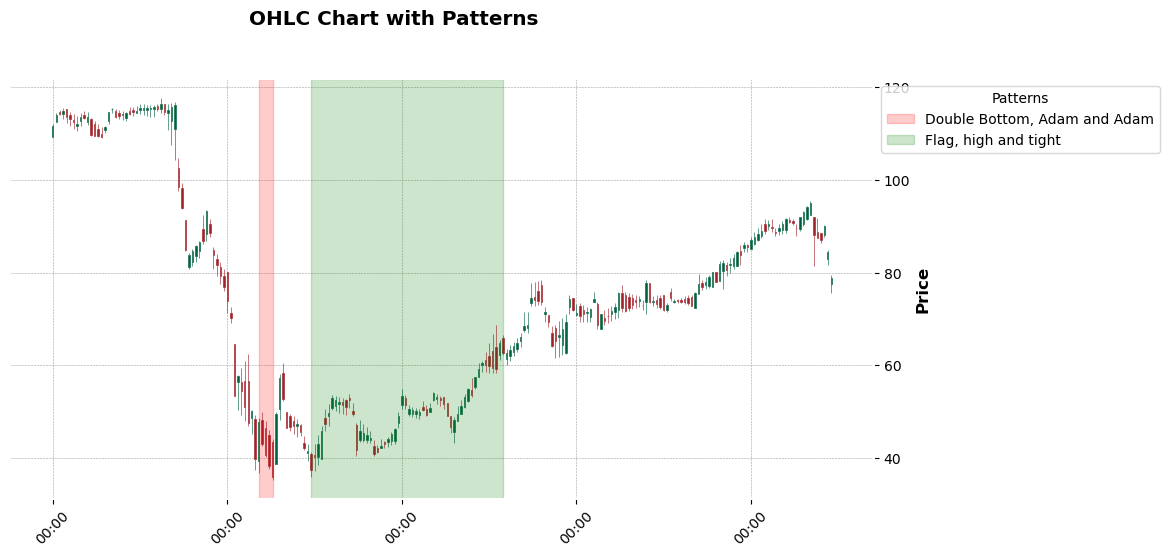

[[6.0, 0.9891744256019592, 0.44691333174705505, 0.2462296038866043], [4.0, 0.9480798244476318, 0.2847805619239807, 0.08794227987527847]]
 predicted patterns


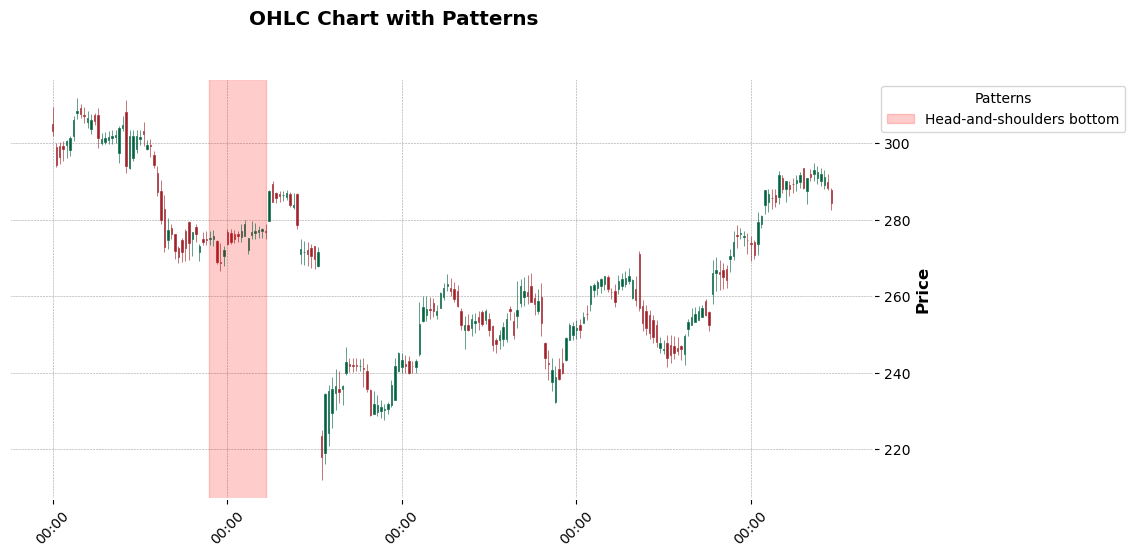

[[5.0, 0.7506155967712402, 0.236546590924263, 0.07233914732933044]]
Real Patterns


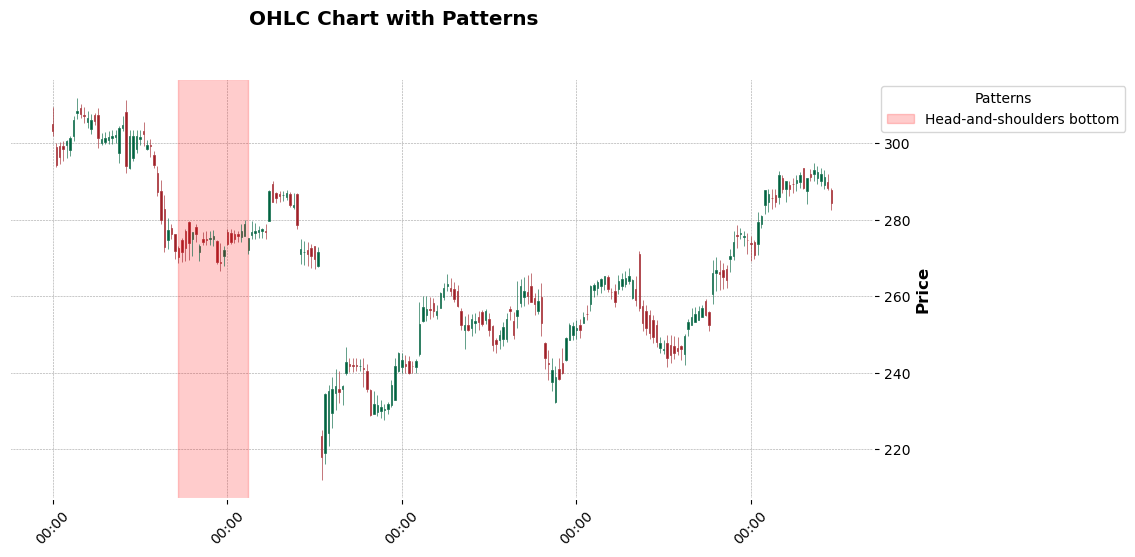

[[5.0, 0.7506155967712402, 0.236546590924263, 0.07233914732933044]]


In [123]:
x= test_data[0] # get the ohcl data
lable = test_data[1]
x = x.to(DEVICE)
lable = lable.to(DEVICE)
for idx in range(10):
    bboxes = cellboxes_to_boxes(model(x))
    bboxes = non_max_suppression(bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
    # plot_image(x[idx].permute(1,2,0).to("cpu"), bboxes)
    print(" predicted patterns")
    plot_image(x[idx], bboxes)
    print(bboxes)
    
    
    lable_bboxes = cellboxes_to_boxes(lable)
    lable_bboxes = non_max_suppression(lable_bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
    print ("Real Patterns")
    plot_image(x[idx], lable_bboxes)
    print(bboxes)

# import sys
# sys.exit()

In [124]:
x

tensor([[[118.6300, 126.4600, 134.2900,  ..., 123.2000, 118.9500, 124.0400],
         [119.9167, 128.7633, 137.6100,  ..., 123.8400, 123.1200, 124.4900],
         [117.0967, 125.3933, 133.6900,  ..., 119.9600, 118.7100, 122.1300],
         [118.3533, 126.8567, 135.3600,  ..., 120.7300, 122.8600, 123.8500]],

        [[ 62.7975,  54.3450,  45.8925,  ...,  38.6500,  38.7300,  38.7400],
         [ 63.6925,  55.0350,  46.3775,  ...,  39.6300,  39.5200,  39.5600],
         [ 62.1425,  53.7950,  45.4475,  ...,  38.4500,  38.4400,  38.6500],
         [ 62.4325,  54.0650,  45.6975,  ...,  38.6600,  38.8600,  38.9400]],

        [[  9.4800,   9.6700,   9.4000,  ...,   7.6300,   7.5100,   7.3900],
         [  9.8100,   9.7300,   9.5200,  ...,   7.6367,   7.5233,   7.4100],
         [  9.3800,   9.3500,   9.1700,  ...,   7.4267,   7.3633,   7.3000],
         [  9.6500,   9.4400,   9.2900,  ...,   7.4433,   7.3867,   7.3300]],

        ...,

        [[123.2047,  84.6820,  46.1593,  ...,  52.9564, 

In [125]:
bboxes = cellboxes_to_boxes(model(x))
bboxes[1]

[[5.0, 0.1535792350769043, 0.061549969017505646, -0.014812062494456768],
 [4.0, -0.11580213904380798, 0.23141151666641235, 0.18214289844036102],
 [1.0, 0.13211140036582947, 0.3678693175315857, 0.17165392637252808],
 [0.0, 0.9133667945861816, 0.48092120885849, 0.044894084334373474],
 [1.0, 0.07577896118164062, 0.6482478976249695, 0.22828201949596405],
 [1.0, -0.03864444047212601, 0.7797583937644958, 0.10907579958438873],
 [4.0, 0.11436482518911362, 0.9166536331176758, 0.08034998178482056]]

In [126]:
for box in bboxes[1]:
    print(box)

[5.0, 0.1535792350769043, 0.061549969017505646, -0.014812062494456768]
[4.0, -0.11580213904380798, 0.23141151666641235, 0.18214289844036102]
[1.0, 0.13211140036582947, 0.3678693175315857, 0.17165392637252808]
[0.0, 0.9133667945861816, 0.48092120885849, 0.044894084334373474]
[1.0, 0.07577896118164062, 0.6482478976249695, 0.22828201949596405]
[1.0, -0.03864444047212601, 0.7797583937644958, 0.10907579958438873]
[4.0, 0.11436482518911362, 0.9166536331176758, 0.08034998178482056]


In [127]:
x[1].shape

torch.Size([4, 224])

In [128]:
import torch
import pandas as pd



# Transpose the tensor to make it [224, 4] and move to CPU
tensor_transposed = x[1].T.cpu()

# Convert to a pandas DataFrame
df = pd.DataFrame(tensor_transposed.numpy(), columns=['Open', 'High', 'Low', 'Close'])

df


Open       High        Low      Close
0    62.797501  63.692497  62.142498  62.432503
1    54.345001  55.035000  53.794998  54.065002
2    45.892498  46.377502  45.447498  45.697502
3    37.439999  37.720001  37.099998  37.330002
4    37.349998  37.400002  36.860001  37.310001
..         ...        ...        ...        ...
219  38.790001  39.380001  37.889999  38.139999
220  38.340000  39.810001  38.340000  38.669998
221  38.650002  39.630001  38.450001  38.660000
222  38.730000  39.520000  38.439999  38.860001
223  38.740002  39.560001  38.650002  38.939999

[224 rows x 4 columns]

In [129]:
#  change the dataset.py or whatever to matc teh prediction structure which is relative to the 1/7 section